###### Instalação de bibliotecas para reprodução.

In [ ]:
#!pip3 install seaborn
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install xgboost
#!pip3 install sklearn
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install catboost

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, recall_score,classification_report,roc_curve,auc,precision_score, f1_score, cohen_kappa_score, confusion_matrix
from matplotlib import pyplot
import warnings 
from sklearn.preprocessing import LabelEncoder

warnings.simplefilter('ignore')

In [2]:
dataset = pd.read_csv("winequality.csv", sep=';')

## Análise Exploratória

In [3]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


##### Dados Faltando

<BarContainer object of 13 artists>

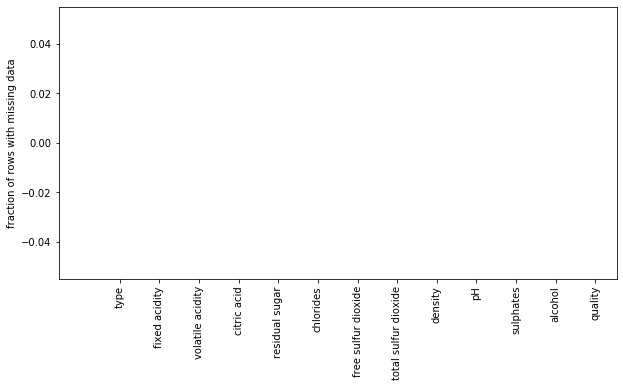

In [4]:
null_counts = dataset.isnull().sum()/len(dataset)
plt.figure(figsize=(10,5))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

##### Eliminando Outliers

A variável alcohol contém alguns valores descrepantes para muito acima da maioria dos valores desta variável, por isso foram eliminados para evitar que gerem ruidos nos modelos.

outras variáveis como residual sugar, fixed acidity, volatile acidity, citric acid entre outras, foi aplicado uma função logaritmica para melhorar a distribuição dos valores das mesmas.

In [5]:
lista = ['128.933.333.333.333', '923.333.333.333.333','956.666.666.666.667','953.333.333.333.333',
            '963.333.333.333.333','973.333.333.333.333','120.666.666.666.667','100.333.333.333.333',
            '110.666.666.666.667','135.666.666.666.667','101.333.333.333.333','109.666.666.666.667',
            '105.666.666.666.667','117.333.333.333.333','112.666.666.666.667','123.333.333.333.333',
            '113.333.333.333.333','113.666.666.666.667','109.333.333.333.333','105.333.333.333.333',
            '114.333.333.333.333','100.333.333.333.333','114.666.666.666.667','116.333.333.333.333',
            '104.666.666.666.667','131.333.333.333.333']


df = dataset[~dataset['alcohol'].isin(lista)]

##### Distribuição da variável target

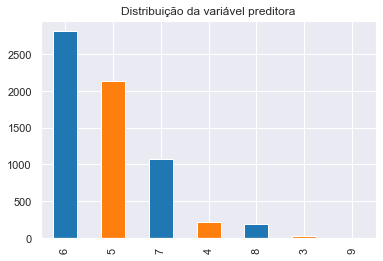

In [6]:
target_counts = df.quality.value_counts()

sns.set(style="darkgrid")
target_counts.plot(kind='bar',title='Distribuição da variável preditora', color=['#1F77B4', '#FF7F0E'])

Como podemos ver no gráfico acima, temos um desbalanceamento entre as classes, onde claramente podemos ver que os valores mais presentes estão entre 5 e 7. 

##### Grafico de densidade

Este tipo de gráfico nos mostra a probabilidade de uma variável de valor contínua tomar determinada faixa de valor.

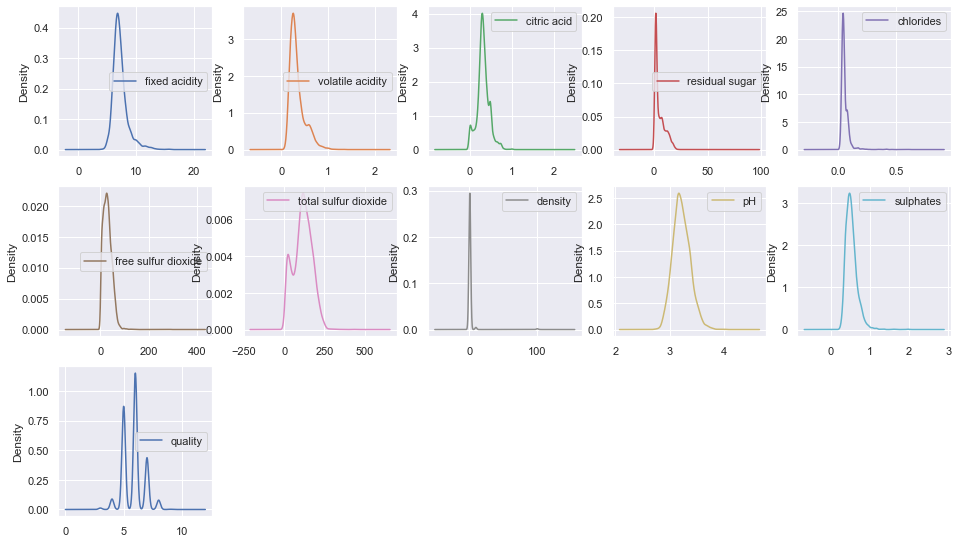

In [7]:
df.plot(kind='density',subplots=True,layout=(5,5), sharex=False, figsize=(16,16))
plt.show()

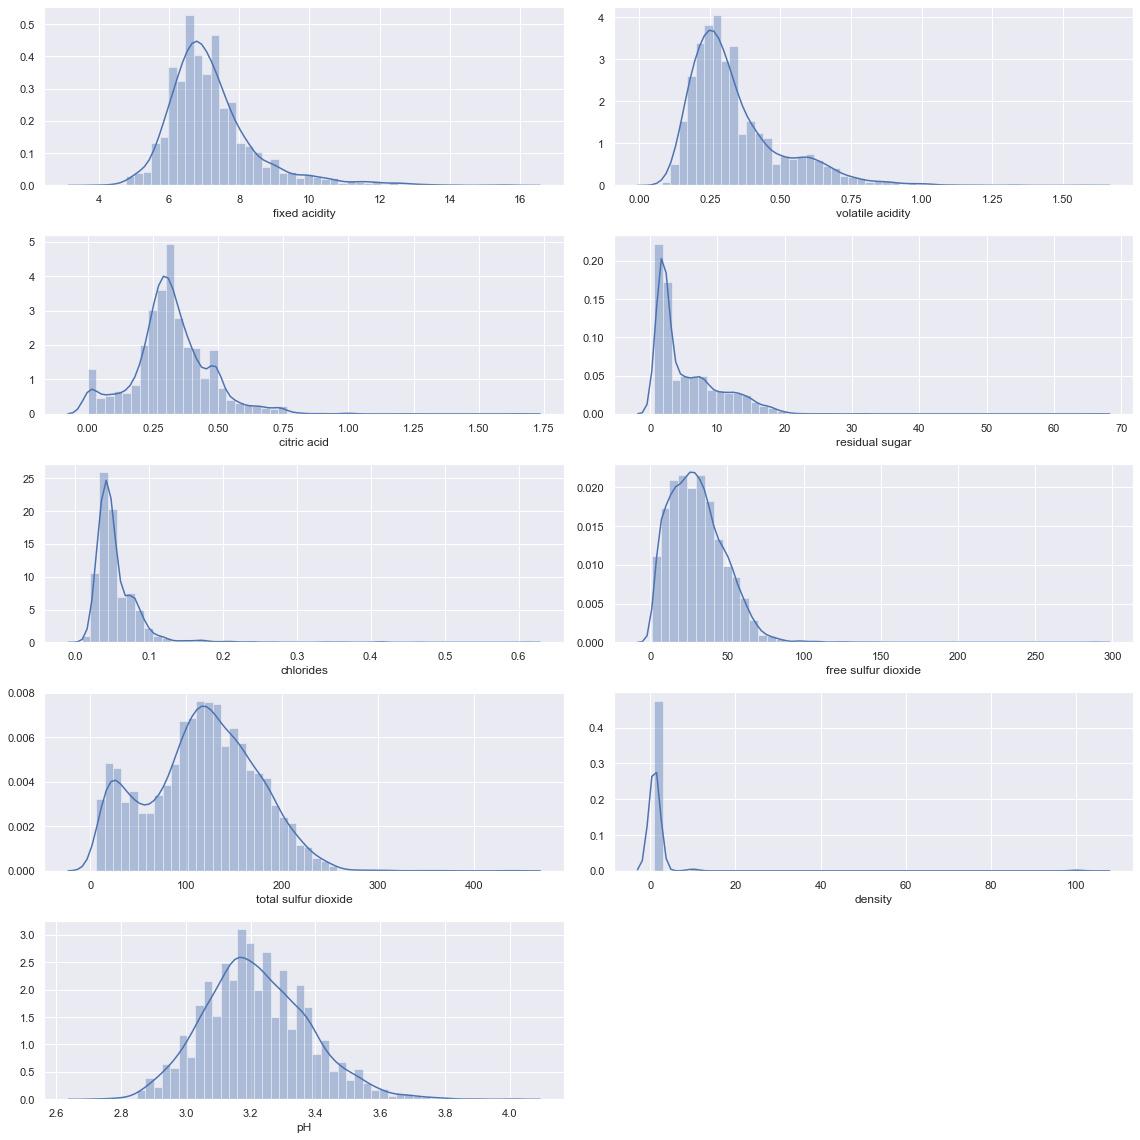

In [8]:
fig = plt.figure(figsize=(16,16))

p1 = fig.add_subplot(521)
p1 = sns.distplot(df['fixed acidity'])

p2 = fig.add_subplot(522)
p2 = sns.distplot(df['volatile acidity'])

p3 = fig.add_subplot(523)
p3 = sns.distplot(df['citric acid'])

p4 = fig.add_subplot(524)
p4 = sns.distplot(df['residual sugar'])

p5 = fig.add_subplot(525)
p5 = sns.distplot(df['chlorides'])

p6 = fig.add_subplot(526)
p6 = sns.distplot(df['free sulfur dioxide'])

p7 = fig.add_subplot(527)
p7 = sns.distplot(df['total sulfur dioxide'])

p8 = fig.add_subplot(528)
p8 = sns.distplot(df['density'])

p9 = fig.add_subplot(529)
p9 = sns.distplot(df['pH'])

plt.tight_layout()
fig = plt.gcf()

Vejamos a qualidade dos vinhos distribuidos na variável tipo (vermelho ou branco). Como podemos ver temos vinhos com melhor avaliados do tipo branco.

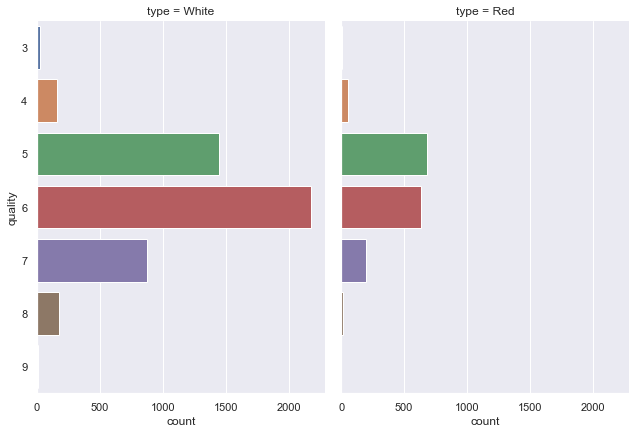

In [9]:
g = sns.catplot(y="quality", col="type", data=df, kind="count", height=6, aspect=.75);

Explorando a qualidade dos vinhos, podemos notar que vinhos com qualidade 8 e 9 tem menor densidade, mantém as menores taxas de acídez volátil e um vinho de qualidade 9 tem os maiores níveis de acídez cítrica e menos calorias. Os valores de ph são muito próximos para todos os níveis de qualidade.

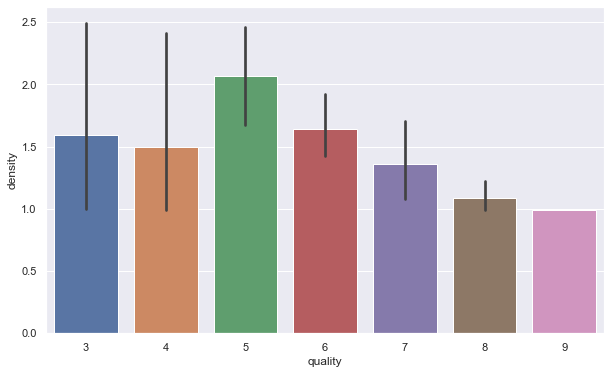

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = df)

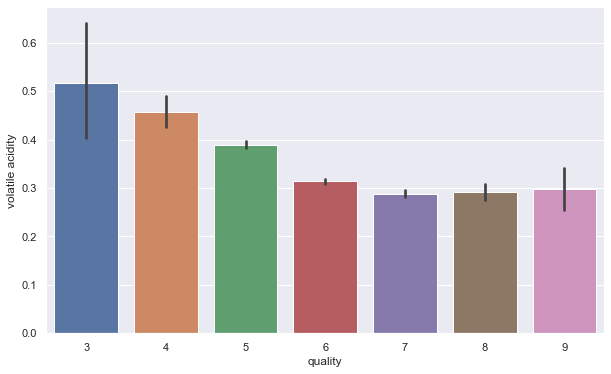

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

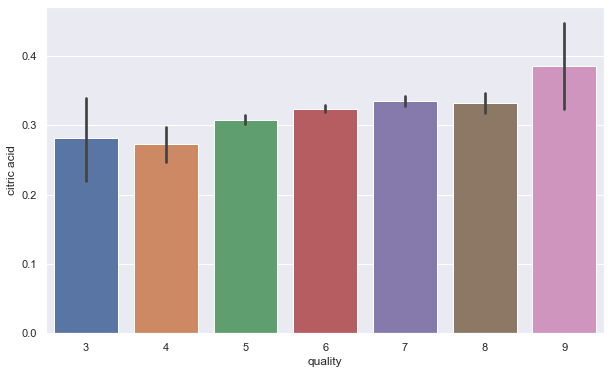

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

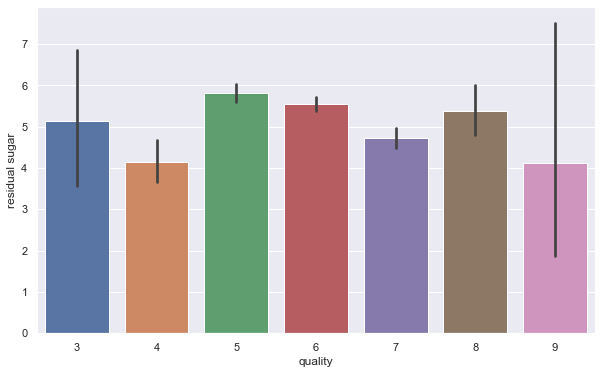

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

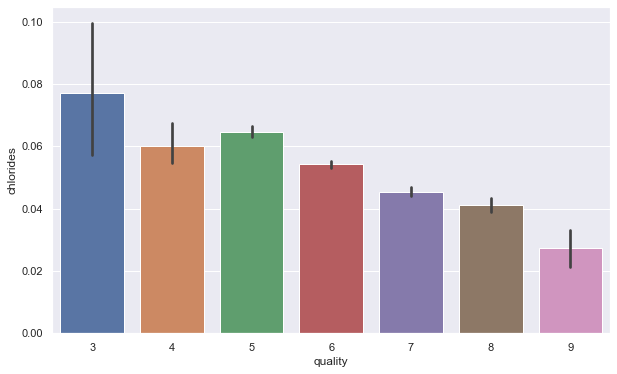

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

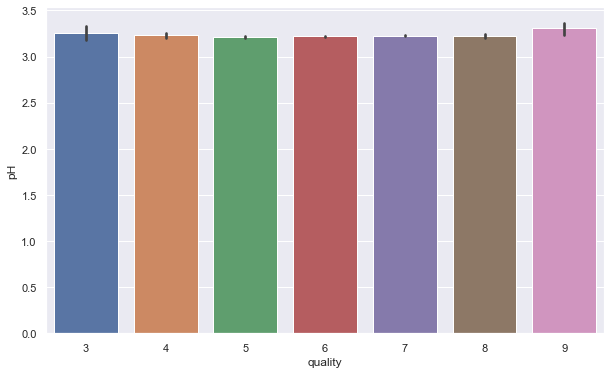

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df)

In [16]:
dataset.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2355,White,7.6,0.48,0.33,7.0,0.024,14.0,130.0,0.99180,3.25,0.45,12.5,7
2945,White,4.9,0.33,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14,8
1005,White,6.6,0.18,0.28,3.3,0.044,18.0,91.0,0.99300,3.42,0.64,10.8,6
3230,White,6.7,0.13,0.57,6.6,0.056,60.0,150.0,0.99548,2.96,0.43,9.4,6
5883,Red,7.4,0.58,0.00,2.0,0.064,7.0,11.0,0.99562,3.45,0.58,11.3,6


In [17]:
cols = ['residual sugar','fixed acidity','volatile acidity','citric acid','residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide']

for c in cols:
    df[c] = round(np.log1p(df[c]),3)

Obs.: Foi utilzado a função de logaritmo com ponto flutuante no casos acima, pois em alguns casos eram gerados valores negativos, e como solução de contorno foi aplicado o log1p pois calcula o logaritmo natural acrescido de uma unidade.

##### Transformação da variável "Type" para numérica.

In [18]:
df['type'] = pd.get_dummies(df['type'])

##### Gráfico de correlação

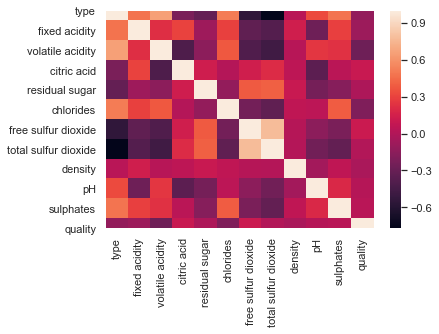

In [19]:
sns.heatmap(df.corr())
plt.show()

##### Alterando variável target para binária

Como vimos no gráfico de distribuição da variável target, temos um desbalanceamento entre as classes do dataset. 
Isso pode dificultar chegarmos a um modelo minimamente satisfatório, por isso a variável target foi alterada para binária.

In [20]:
bins = (1, 5.1, 9)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df['quality'] = df['quality'].astype('str')
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

1    4082
0    2375
Name: quality, dtype: int64

In [21]:
df['type'] = df['type'].astype('float64')
df['fixed acidity'] = df['fixed acidity'].astype('float64')
df['volatile acidity'] = df['volatile acidity'].astype('float64')
df['citric acid'] = df['citric acid'].astype('float64')
df['residual sugar'] = df['residual sugar'].astype('float64')
df['chlorides'] = df['chlorides'].astype('float64')
df['free sulfur dioxide'] = df['free sulfur dioxide'].astype('float64')
df['total sulfur dioxide'] = df['total sulfur dioxide'].astype('float64')
df['density'] = df['density'].astype('float64')
df['pH'] = df['pH'].astype('float64')
df['sulphates'] = df['sulphates'].astype('float64')
df['alcohol'] = df['alcohol'].astype('float64')

##### Divisão dos dados entre treino, teste e validação

In [22]:
y = df.quality
x = df.drop('quality',axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, random_state = 10)

##### Modelos

Para o treinamento dos modelos foram escolhidos algoritmos baseados em árvores pois a relação entre as variáveis dependente e indepente não apresenta alta linearidade. 

Foi escolhido random forest pela versatilidade e poder de lidar com dados de muitas dimensões.

Além de algorítmos que convertem aprendizado fraco em aprendizado forte (boosting) combinando previsões de várias pequenas árvores.

##### Grid Search

Nesta fase pré-treinamento dos modelos, estamos procurando os melhores parâmetros para nossos algoritmos, neste caso usaremos Random Forest, Adaboosting, XGBoost e Gradient Boosting.

E para descobrir a melhor combinação de parâmetros, vamos usar o grid search para os ajudar.

In [75]:
# Thanks for the David batista posted class on "http://www.davidsbatista.net/blog/2018/02/23/model_optimization/"
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Alguns estimadores estão com parâmetros ausentes: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=2, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Executando GridSearchCV em %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [87]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'XGBoostClassifier' : XGBClassifier(),
    'CatBoostClassifier' : CatBoostClassifier()
}

params = {
    'RandomForestClassifier': { 'n_estimators': [100, 120, 300, 500, 800, 1200]},
    
    
    'AdaBoostClassifier':  { 'n_estimators': [100, 120, 300, 500, 800, 1200],
                           'learning_rate': [0.5, 0.7, 0.8, 1.0]},
    
    
    'GradientBoostingClassifier': { 'n_estimators': [100, 120, 300, 500, 800, 1200],
                                   'learning_rate': [0.5, 0.7, 0.8, 1.0]},
    
    'XGBoostClassifier' : {'n_estimators': [100, 120, 300, 500, 800, 1200],
                                   'learning_rate': [0.5, 0.7, 0.8, 1.0]},
    
    'CatBoostClassifier' : {'n_estimators': [100, 120, 300, 500, 800, 1200],
                                   'learning_rate': [0.5, 0.7, 0.8, 1.0]}
    
}

In [88]:
helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, scoring='f1', n_jobs=4)

Executando GridSearchCV em RandomForestClassifier.
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Executando GridSearchCV em AdaBoostClassifier.
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   50.2s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Executando GridSearchCV em GradientBoostingClassifier.
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   29.3s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Executando GridSearchCV em XGBoostClassifier.
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   49.4s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  2.4min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Executando GridSearchCV em CatBoostClassifier.
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed: 45.5min finished


In [89]:
helper.score_summary(sort_by='max_score')

RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBoostClassifier
CatBoostClassifier


,estimator,min_score,mean_score,max_score,std_score,learning_rate,n_estimators
0,RandomForestClassifier,0.849725,0.858896,0.867355,0.0056779,NaN,100
1,RandomForestClassifier,0.853914,0.85868,0.865079,0.0037543,NaN,120
4,RandomForestClassifier,0.853248,0.857944,0.864608,0.00371553,NaN,800
3,RandomForestClassifier,0.855538,0.859259,0.863636,0.00347719,NaN,500
2,RandomForestClassifier,0.85113,0.857697,0.863275,0.00438565,NaN,300
71,XGBoostClassifier,0.823341,0.837748,0.863158,0.0136565,0.8,1200
34,GradientBoostingClassifier,0.822775,0.842964,0.86243,0.0126241,0.5,800
35,GradientBoostingClassifier,0.834532,0.845572,0.860821,0.00856846,0.5,1200
5,RandomForestClassifier,0.850482,0.856392,0.860539,0.00345777,NaN,1200
33,GradientBoostingClassifier,0.832536,0.845479,0.859451,0.00919403,0.5,500


0:	learn: 0.5467214	total: 14.5ms	remaining: 4.35s
1:	learn: 0.5017336	total: 27.1ms	remaining: 4.04s
2:	learn: 0.4826109	total: 39.6ms	remaining: 3.92s
3:	learn: 0.4719166	total: 48.9ms	remaining: 3.62s
4:	learn: 0.4676950	total: 62ms	remaining: 3.65s
5:	learn: 0.4579087	total: 74.6ms	remaining: 3.65s
6:	learn: 0.4507636	total: 86.8ms	remaining: 3.63s
7:	learn: 0.4402518	total: 99.1ms	remaining: 3.62s
8:	learn: 0.4367570	total: 113ms	remaining: 3.65s
9:	learn: 0.4306338	total: 126ms	remaining: 3.65s
10:	learn: 0.4240693	total: 139ms	remaining: 3.64s
11:	learn: 0.4150399	total: 148ms	remaining: 3.54s
12:	learn: 0.4105305	total: 161ms	remaining: 3.55s
13:	learn: 0.4074452	total: 173ms	remaining: 3.53s
14:	learn: 0.4011171	total: 184ms	remaining: 3.5s
15:	learn: 0.3953801	total: 194ms	remaining: 3.45s
16:	learn: 0.3866036	total: 208ms	remaining: 3.46s
17:	learn: 0.3782566	total: 222ms	remaining: 3.48s
18:	learn: 0.3733999	total: 238ms	remaining: 3.52s
19:	learn: 0.3710933	total: 251ms	re

170:	learn: 0.0721616	total: 2.25s	remaining: 1.7s
171:	learn: 0.0715235	total: 2.28s	remaining: 1.69s
172:	learn: 0.0710329	total: 2.29s	remaining: 1.68s
173:	learn: 0.0702626	total: 2.31s	remaining: 1.67s
174:	learn: 0.0696990	total: 2.32s	remaining: 1.66s
175:	learn: 0.0690353	total: 2.34s	remaining: 1.65s
176:	learn: 0.0687917	total: 2.35s	remaining: 1.63s
177:	learn: 0.0682811	total: 2.36s	remaining: 1.62s
178:	learn: 0.0674809	total: 2.37s	remaining: 1.6s
179:	learn: 0.0662212	total: 2.39s	remaining: 1.59s
180:	learn: 0.0652541	total: 2.4s	remaining: 1.58s
181:	learn: 0.0647314	total: 2.41s	remaining: 1.56s
182:	learn: 0.0642185	total: 2.42s	remaining: 1.55s
183:	learn: 0.0637754	total: 2.44s	remaining: 1.54s
184:	learn: 0.0627931	total: 2.45s	remaining: 1.52s
185:	learn: 0.0624011	total: 2.46s	remaining: 1.51s
186:	learn: 0.0617153	total: 2.48s	remaining: 1.5s
187:	learn: 0.0611729	total: 2.49s	remaining: 1.48s
188:	learn: 0.0607348	total: 2.5s	remaining: 1.47s
189:	learn: 0.060

34:	learn: 0.3014541	total: 426ms	remaining: 3.22s
35:	learn: 0.2967791	total: 439ms	remaining: 3.22s
36:	learn: 0.2922991	total: 455ms	remaining: 3.23s
37:	learn: 0.2895649	total: 467ms	remaining: 3.22s
38:	learn: 0.2828134	total: 477ms	remaining: 3.19s
39:	learn: 0.2784618	total: 489ms	remaining: 3.18s
40:	learn: 0.2758249	total: 504ms	remaining: 3.18s
41:	learn: 0.2710979	total: 517ms	remaining: 3.18s
42:	learn: 0.2681889	total: 527ms	remaining: 3.15s
43:	learn: 0.2646673	total: 539ms	remaining: 3.14s
44:	learn: 0.2602168	total: 553ms	remaining: 3.13s
45:	learn: 0.2578103	total: 566ms	remaining: 3.12s
46:	learn: 0.2535108	total: 575ms	remaining: 3.1s
47:	learn: 0.2505565	total: 589ms	remaining: 3.09s
48:	learn: 0.2444430	total: 603ms	remaining: 3.09s
49:	learn: 0.2394756	total: 616ms	remaining: 3.08s
50:	learn: 0.2371538	total: 626ms	remaining: 3.06s
51:	learn: 0.2350184	total: 639ms	remaining: 3.05s
52:	learn: 0.2316547	total: 653ms	remaining: 3.04s
53:	learn: 0.2293521	total: 665m

196:	learn: 0.0533048	total: 2.46s	remaining: 1.29s
197:	learn: 0.0529758	total: 2.47s	remaining: 1.27s
198:	learn: 0.0526321	total: 2.48s	remaining: 1.26s
199:	learn: 0.0520633	total: 2.5s	remaining: 1.25s
200:	learn: 0.0517062	total: 2.51s	remaining: 1.24s
201:	learn: 0.0513332	total: 2.52s	remaining: 1.22s
202:	learn: 0.0508861	total: 2.53s	remaining: 1.21s
203:	learn: 0.0502800	total: 2.55s	remaining: 1.2s
204:	learn: 0.0498514	total: 2.56s	remaining: 1.19s
205:	learn: 0.0494912	total: 2.57s	remaining: 1.17s
206:	learn: 0.0492914	total: 2.58s	remaining: 1.16s
207:	learn: 0.0490878	total: 2.6s	remaining: 1.15s
208:	learn: 0.0484466	total: 2.61s	remaining: 1.14s
209:	learn: 0.0481652	total: 2.62s	remaining: 1.12s
210:	learn: 0.0478476	total: 2.63s	remaining: 1.11s
211:	learn: 0.0472724	total: 2.65s	remaining: 1.1s
212:	learn: 0.0468609	total: 2.66s	remaining: 1.09s
213:	learn: 0.0465232	total: 2.67s	remaining: 1.07s
214:	learn: 0.0460806	total: 2.68s	remaining: 1.06s
215:	learn: 0.04

59:	learn: 0.2165253	total: 734ms	remaining: 2.94s
60:	learn: 0.2151622	total: 744ms	remaining: 2.92s
61:	learn: 0.2128918	total: 758ms	remaining: 2.91s
62:	learn: 0.2096606	total: 770ms	remaining: 2.9s
63:	learn: 0.2074720	total: 780ms	remaining: 2.88s
64:	learn: 0.2060781	total: 793ms	remaining: 2.87s
65:	learn: 0.2028111	total: 808ms	remaining: 2.86s
66:	learn: 0.2001542	total: 821ms	remaining: 2.85s
67:	learn: 0.1965997	total: 834ms	remaining: 2.85s
68:	learn: 0.1954174	total: 842ms	remaining: 2.82s
69:	learn: 0.1930326	total: 857ms	remaining: 2.81s
70:	learn: 0.1894498	total: 870ms	remaining: 2.81s
71:	learn: 0.1868720	total: 882ms	remaining: 2.79s
72:	learn: 0.1844630	total: 892ms	remaining: 2.77s
73:	learn: 0.1805578	total: 906ms	remaining: 2.77s
74:	learn: 0.1787060	total: 918ms	remaining: 2.75s
75:	learn: 0.1774356	total: 930ms	remaining: 2.74s
76:	learn: 0.1746990	total: 941ms	remaining: 2.73s
77:	learn: 0.1730874	total: 955ms	remaining: 2.72s
78:	learn: 0.1706607	total: 969m

218:	learn: 0.0436642	total: 2.75s	remaining: 1.02s
219:	learn: 0.0434237	total: 2.77s	remaining: 1.01s
220:	learn: 0.0430997	total: 2.78s	remaining: 995ms
221:	learn: 0.0427888	total: 2.79s	remaining: 982ms
222:	learn: 0.0425625	total: 2.81s	remaining: 970ms
223:	learn: 0.0422420	total: 2.82s	remaining: 956ms
224:	learn: 0.0420312	total: 2.83s	remaining: 944ms
225:	learn: 0.0415282	total: 2.85s	remaining: 932ms
226:	learn: 0.0411542	total: 2.86s	remaining: 919ms
227:	learn: 0.0409698	total: 2.87s	remaining: 905ms
228:	learn: 0.0407613	total: 2.88s	remaining: 893ms
229:	learn: 0.0405600	total: 2.89s	remaining: 881ms
230:	learn: 0.0402726	total: 2.91s	remaining: 868ms
231:	learn: 0.0399243	total: 2.92s	remaining: 855ms
232:	learn: 0.0397157	total: 2.93s	remaining: 842ms
233:	learn: 0.0395163	total: 2.94s	remaining: 830ms
234:	learn: 0.0390159	total: 2.96s	remaining: 818ms
235:	learn: 0.0387632	total: 2.97s	remaining: 805ms
236:	learn: 0.0384140	total: 2.98s	remaining: 792ms
237:	learn: 

84:	learn: 0.1675070	total: 1.05s	remaining: 2.66s
85:	learn: 0.1663808	total: 1.06s	remaining: 2.65s
86:	learn: 0.1647458	total: 1.08s	remaining: 2.64s
87:	learn: 0.1630391	total: 1.09s	remaining: 2.62s
88:	learn: 0.1620882	total: 1.1s	remaining: 2.6s
89:	learn: 0.1599431	total: 1.11s	remaining: 2.59s
90:	learn: 0.1581790	total: 1.13s	remaining: 2.58s
91:	learn: 0.1569148	total: 1.14s	remaining: 2.58s
92:	learn: 0.1556673	total: 1.15s	remaining: 2.56s
93:	learn: 0.1539729	total: 1.16s	remaining: 2.54s
94:	learn: 0.1533934	total: 1.18s	remaining: 2.54s
95:	learn: 0.1509870	total: 1.19s	remaining: 2.52s
96:	learn: 0.1483503	total: 1.2s	remaining: 2.5s
97:	learn: 0.1477102	total: 1.21s	remaining: 2.49s
98:	learn: 0.1458154	total: 1.22s	remaining: 2.49s
99:	learn: 0.1443330	total: 1.24s	remaining: 2.47s
100:	learn: 0.1426380	total: 1.25s	remaining: 2.45s
101:	learn: 0.1414054	total: 1.26s	remaining: 2.44s
102:	learn: 0.1401627	total: 1.27s	remaining: 2.44s
103:	learn: 0.1378426	total: 1.2

246:	learn: 0.0369011	total: 3.09s	remaining: 662ms
247:	learn: 0.0365601	total: 3.1s	remaining: 650ms
248:	learn: 0.0362049	total: 3.11s	remaining: 638ms
249:	learn: 0.0358761	total: 3.12s	remaining: 625ms
250:	learn: 0.0356930	total: 3.13s	remaining: 612ms
251:	learn: 0.0354173	total: 3.15s	remaining: 600ms
252:	learn: 0.0351391	total: 3.16s	remaining: 587ms
253:	learn: 0.0349368	total: 3.17s	remaining: 574ms
254:	learn: 0.0346108	total: 3.18s	remaining: 562ms
255:	learn: 0.0344984	total: 3.2s	remaining: 549ms
256:	learn: 0.0342838	total: 3.21s	remaining: 537ms
257:	learn: 0.0339786	total: 3.22s	remaining: 524ms
258:	learn: 0.0337699	total: 3.23s	remaining: 512ms
259:	learn: 0.0336077	total: 3.25s	remaining: 499ms
260:	learn: 0.0333540	total: 3.26s	remaining: 487ms
261:	learn: 0.0331122	total: 3.27s	remaining: 474ms
262:	learn: 0.0329002	total: 3.28s	remaining: 462ms
263:	learn: 0.0325749	total: 3.29s	remaining: 449ms
264:	learn: 0.0324002	total: 3.31s	remaining: 437ms
265:	learn: 0.

121:	learn: 0.1117451	total: 1.57s	remaining: 2.29s
122:	learn: 0.1105275	total: 1.58s	remaining: 2.27s
123:	learn: 0.1097175	total: 1.59s	remaining: 2.26s
124:	learn: 0.1083270	total: 1.6s	remaining: 2.24s
125:	learn: 0.1067415	total: 1.61s	remaining: 2.23s
126:	learn: 0.1062181	total: 1.63s	remaining: 2.22s
127:	learn: 0.1053591	total: 1.64s	remaining: 2.2s
128:	learn: 0.1047395	total: 1.65s	remaining: 2.19s
129:	learn: 0.1032101	total: 1.66s	remaining: 2.17s
130:	learn: 0.1022365	total: 1.68s	remaining: 2.17s
131:	learn: 0.1016172	total: 1.69s	remaining: 2.15s
132:	learn: 0.1005667	total: 1.7s	remaining: 2.14s
133:	learn: 0.0992389	total: 1.71s	remaining: 2.12s
134:	learn: 0.0980763	total: 1.73s	remaining: 2.11s
135:	learn: 0.0972119	total: 1.74s	remaining: 2.1s
136:	learn: 0.0965081	total: 1.75s	remaining: 2.08s
137:	learn: 0.0950646	total: 1.77s	remaining: 2.07s
138:	learn: 0.0940071	total: 1.78s	remaining: 2.06s
139:	learn: 0.0922219	total: 1.79s	remaining: 2.05s
140:	learn: 0.09

288:	learn: 0.0267105	total: 3.61s	remaining: 137ms
289:	learn: 0.0265112	total: 3.62s	remaining: 125ms
290:	learn: 0.0263270	total: 3.64s	remaining: 112ms
291:	learn: 0.0260458	total: 3.65s	remaining: 100ms
292:	learn: 0.0259793	total: 3.66s	remaining: 87.5ms
293:	learn: 0.0257703	total: 3.67s	remaining: 74.9ms
294:	learn: 0.0256360	total: 3.68s	remaining: 62.4ms
295:	learn: 0.0254990	total: 3.7s	remaining: 50ms
296:	learn: 0.0253452	total: 3.71s	remaining: 37.5ms
297:	learn: 0.0252645	total: 3.72s	remaining: 25ms
298:	learn: 0.0251102	total: 3.73s	remaining: 12.5ms
299:	learn: 0.0249839	total: 3.75s	remaining: 0us
0:	learn: 0.5456990	total: 14.6ms	remaining: 4.36s
1:	learn: 0.5004782	total: 23.4ms	remaining: 3.48s
2:	learn: 0.4842342	total: 38.9ms	remaining: 3.85s
3:	learn: 0.4722656	total: 51.8ms	remaining: 3.83s
4:	learn: 0.4652368	total: 65.5ms	remaining: 3.87s
5:	learn: 0.4593181	total: 77.5ms	remaining: 3.8s
6:	learn: 0.4528608	total: 86.2ms	remaining: 3.61s
7:	learn: 0.4461218	

151:	learn: 0.0847683	total: 1.9s	remaining: 1.85s
152:	learn: 0.0828700	total: 1.91s	remaining: 1.83s
153:	learn: 0.0812734	total: 1.92s	remaining: 1.82s
154:	learn: 0.0801837	total: 1.93s	remaining: 1.81s
155:	learn: 0.0790634	total: 1.95s	remaining: 1.8s
156:	learn: 0.0786301	total: 1.96s	remaining: 1.79s
157:	learn: 0.0780675	total: 1.98s	remaining: 1.78s
158:	learn: 0.0774021	total: 1.99s	remaining: 1.77s
159:	learn: 0.0766770	total: 2s	remaining: 1.75s
160:	learn: 0.0763989	total: 2.02s	remaining: 1.75s
161:	learn: 0.0748238	total: 2.03s	remaining: 1.73s
162:	learn: 0.0742710	total: 2.04s	remaining: 1.72s
163:	learn: 0.0731993	total: 2.06s	remaining: 1.71s
164:	learn: 0.0721988	total: 2.07s	remaining: 1.7s
165:	learn: 0.0715477	total: 2.08s	remaining: 1.68s
166:	learn: 0.0707722	total: 2.09s	remaining: 1.67s
167:	learn: 0.0701218	total: 2.11s	remaining: 1.66s
168:	learn: 0.0697442	total: 2.12s	remaining: 1.65s
169:	learn: 0.0692594	total: 2.13s	remaining: 1.63s
170:	learn: 0.0682

10:	learn: 0.4288583	total: 137ms	remaining: 3.59s
11:	learn: 0.4252326	total: 150ms	remaining: 3.61s
12:	learn: 0.4169508	total: 163ms	remaining: 3.59s
13:	learn: 0.4119936	total: 174ms	remaining: 3.55s
14:	learn: 0.4040164	total: 185ms	remaining: 3.51s
15:	learn: 0.3983213	total: 198ms	remaining: 3.52s
16:	learn: 0.3921524	total: 210ms	remaining: 3.5s
17:	learn: 0.3871115	total: 220ms	remaining: 3.45s
18:	learn: 0.3808980	total: 234ms	remaining: 3.46s
19:	learn: 0.3745539	total: 247ms	remaining: 3.46s
20:	learn: 0.3655810	total: 259ms	remaining: 3.45s
21:	learn: 0.3585873	total: 269ms	remaining: 3.4s
22:	learn: 0.3542184	total: 283ms	remaining: 3.4s
23:	learn: 0.3484178	total: 296ms	remaining: 3.4s
24:	learn: 0.3431618	total: 308ms	remaining: 3.39s
25:	learn: 0.3351548	total: 318ms	remaining: 3.35s
26:	learn: 0.3302021	total: 331ms	remaining: 3.35s
27:	learn: 0.3237574	total: 346ms	remaining: 3.36s
28:	learn: 0.3187648	total: 359ms	remaining: 3.35s
29:	learn: 0.3137124	total: 373ms	r

170:	learn: 0.0703752	total: 2.6s	remaining: 1.97s
171:	learn: 0.0695249	total: 2.63s	remaining: 1.96s
172:	learn: 0.0691593	total: 2.64s	remaining: 1.94s
173:	learn: 0.0688227	total: 2.65s	remaining: 1.92s
174:	learn: 0.0682930	total: 2.77s	remaining: 1.98s
175:	learn: 0.0678900	total: 2.79s	remaining: 1.97s
176:	learn: 0.0667643	total: 2.82s	remaining: 1.96s
177:	learn: 0.0662600	total: 2.84s	remaining: 1.95s
178:	learn: 0.0656483	total: 2.87s	remaining: 1.94s
179:	learn: 0.0644844	total: 2.88s	remaining: 1.92s
180:	learn: 0.0638617	total: 2.9s	remaining: 1.91s
181:	learn: 0.0633838	total: 2.92s	remaining: 1.89s
182:	learn: 0.0630694	total: 2.95s	remaining: 1.89s
183:	learn: 0.0627265	total: 2.97s	remaining: 1.87s
184:	learn: 0.0619090	total: 3s	remaining: 1.86s
185:	learn: 0.0615706	total: 3.04s	remaining: 1.86s
186:	learn: 0.0609831	total: 3.06s	remaining: 1.85s
187:	learn: 0.0602980	total: 3.08s	remaining: 1.83s
188:	learn: 0.0599063	total: 3.09s	remaining: 1.81s
189:	learn: 0.059

33:	learn: 0.3068107	total: 512ms	remaining: 4.01s
34:	learn: 0.3030889	total: 530ms	remaining: 4.01s
35:	learn: 0.2982523	total: 541ms	remaining: 3.97s
36:	learn: 0.2940426	total: 552ms	remaining: 3.92s
37:	learn: 0.2892512	total: 563ms	remaining: 3.88s
38:	learn: 0.2880072	total: 575ms	remaining: 3.85s
39:	learn: 0.2837542	total: 587ms	remaining: 3.82s
40:	learn: 0.2815512	total: 597ms	remaining: 3.77s
41:	learn: 0.2793081	total: 609ms	remaining: 3.74s
42:	learn: 0.2755220	total: 655ms	remaining: 3.91s
43:	learn: 0.2723961	total: 678ms	remaining: 3.94s
44:	learn: 0.2671913	total: 696ms	remaining: 3.94s
45:	learn: 0.2638698	total: 710ms	remaining: 3.92s
46:	learn: 0.2609946	total: 727ms	remaining: 3.91s
47:	learn: 0.2575519	total: 739ms	remaining: 3.88s
48:	learn: 0.2525262	total: 751ms	remaining: 3.85s
49:	learn: 0.2496786	total: 774ms	remaining: 3.87s
50:	learn: 0.2468585	total: 792ms	remaining: 3.87s
51:	learn: 0.2436887	total: 806ms	remaining: 3.84s
52:	learn: 0.2391643	total: 819

198:	learn: 0.0533145	total: 3.22s	remaining: 1.64s
199:	learn: 0.0531675	total: 3.23s	remaining: 1.62s
200:	learn: 0.0528900	total: 3.25s	remaining: 1.6s
201:	learn: 0.0525328	total: 3.26s	remaining: 1.58s
202:	learn: 0.0520921	total: 3.27s	remaining: 1.56s
203:	learn: 0.0517482	total: 3.28s	remaining: 1.54s
204:	learn: 0.0514998	total: 3.29s	remaining: 1.53s
205:	learn: 0.0511478	total: 3.31s	remaining: 1.51s
206:	learn: 0.0509752	total: 3.32s	remaining: 1.49s
207:	learn: 0.0503942	total: 3.33s	remaining: 1.47s
208:	learn: 0.0499842	total: 3.34s	remaining: 1.46s
209:	learn: 0.0497462	total: 3.36s	remaining: 1.44s
210:	learn: 0.0493400	total: 3.37s	remaining: 1.42s
211:	learn: 0.0489205	total: 3.38s	remaining: 1.4s
212:	learn: 0.0486729	total: 3.39s	remaining: 1.39s
213:	learn: 0.0481079	total: 3.41s	remaining: 1.37s
214:	learn: 0.0475507	total: 3.42s	remaining: 1.35s
215:	learn: 0.0470902	total: 3.43s	remaining: 1.33s
216:	learn: 0.0468503	total: 3.44s	remaining: 1.32s
217:	learn: 0.

66:	learn: 0.2096072	total: 1.07s	remaining: 3.72s
67:	learn: 0.2071453	total: 1.09s	remaining: 3.71s
68:	learn: 0.2048324	total: 1.1s	remaining: 3.68s
69:	learn: 0.2028486	total: 1.11s	remaining: 3.65s
70:	learn: 0.2003328	total: 1.12s	remaining: 3.62s
71:	learn: 0.1980484	total: 1.14s	remaining: 3.6s
72:	learn: 0.1966035	total: 1.15s	remaining: 3.57s
73:	learn: 0.1944594	total: 1.17s	remaining: 3.57s
74:	learn: 0.1924594	total: 1.18s	remaining: 3.54s
75:	learn: 0.1909780	total: 1.19s	remaining: 3.52s
76:	learn: 0.1888376	total: 1.2s	remaining: 3.48s
77:	learn: 0.1867715	total: 1.22s	remaining: 3.46s
78:	learn: 0.1850898	total: 1.23s	remaining: 3.44s
79:	learn: 0.1833115	total: 1.24s	remaining: 3.41s
80:	learn: 0.1809233	total: 1.25s	remaining: 3.38s
81:	learn: 0.1789729	total: 1.26s	remaining: 3.36s
82:	learn: 0.1769567	total: 1.28s	remaining: 3.36s
83:	learn: 0.1742703	total: 1.3s	remaining: 3.34s
84:	learn: 0.1722495	total: 1.31s	remaining: 3.32s
85:	learn: 0.1696744	total: 1.33s	r

226:	learn: 0.0423502	total: 9.63s	remaining: 3.1s
227:	learn: 0.0420715	total: 9.66s	remaining: 3.05s
228:	learn: 0.0417255	total: 9.69s	remaining: 3s
229:	learn: 0.0415467	total: 9.71s	remaining: 2.96s
230:	learn: 0.0413320	total: 9.74s	remaining: 2.91s
231:	learn: 0.0411655	total: 9.79s	remaining: 2.87s
232:	learn: 0.0408267	total: 9.81s	remaining: 2.82s
233:	learn: 0.0403241	total: 9.82s	remaining: 2.77s
234:	learn: 0.0400938	total: 9.86s	remaining: 2.73s
235:	learn: 0.0397434	total: 9.88s	remaining: 2.68s
236:	learn: 0.0392158	total: 9.9s	remaining: 2.63s
237:	learn: 0.0389146	total: 9.92s	remaining: 2.58s
238:	learn: 0.0386734	total: 9.98s	remaining: 2.55s
239:	learn: 0.0384830	total: 10s	remaining: 2.5s
240:	learn: 0.0381269	total: 10.1s	remaining: 2.46s
241:	learn: 0.0377865	total: 10.1s	remaining: 2.42s
242:	learn: 0.0371572	total: 10.1s	remaining: 2.37s
243:	learn: 0.0370601	total: 10.1s	remaining: 2.32s
244:	learn: 0.0368022	total: 10.1s	remaining: 2.28s
245:	learn: 0.036559

96:	learn: 0.1483985	total: 2.73s	remaining: 5.72s
97:	learn: 0.1460169	total: 2.75s	remaining: 5.67s
98:	learn: 0.1450326	total: 2.77s	remaining: 5.62s
99:	learn: 0.1439573	total: 2.78s	remaining: 5.57s
100:	learn: 0.1424434	total: 2.8s	remaining: 5.51s
101:	learn: 0.1408028	total: 2.81s	remaining: 5.46s
102:	learn: 0.1392571	total: 2.83s	remaining: 5.41s
103:	learn: 0.1372868	total: 2.84s	remaining: 5.36s
104:	learn: 0.1363614	total: 2.86s	remaining: 5.31s
105:	learn: 0.1354813	total: 2.88s	remaining: 5.26s
106:	learn: 0.1332317	total: 2.89s	remaining: 5.21s
107:	learn: 0.1318025	total: 2.91s	remaining: 5.17s
108:	learn: 0.1291004	total: 2.92s	remaining: 5.12s
109:	learn: 0.1275507	total: 2.94s	remaining: 5.08s
110:	learn: 0.1268583	total: 2.96s	remaining: 5.04s
111:	learn: 0.1256527	total: 2.98s	remaining: 5s
112:	learn: 0.1251074	total: 3s	remaining: 4.97s
113:	learn: 0.1247927	total: 3.06s	remaining: 4.99s
114:	learn: 0.1232287	total: 3.09s	remaining: 4.97s
115:	learn: 0.1207249	t

257:	learn: 0.0348487	total: 5.69s	remaining: 926ms
258:	learn: 0.0344593	total: 5.75s	remaining: 911ms
259:	learn: 0.0341635	total: 5.77s	remaining: 888ms
260:	learn: 0.0338926	total: 5.79s	remaining: 865ms
261:	learn: 0.0337336	total: 5.8s	remaining: 842ms
262:	learn: 0.0334095	total: 5.82s	remaining: 819ms
263:	learn: 0.0330618	total: 5.83s	remaining: 796ms
264:	learn: 0.0328569	total: 5.85s	remaining: 773ms
265:	learn: 0.0325815	total: 5.86s	remaining: 750ms
266:	learn: 0.0323596	total: 5.88s	remaining: 727ms
267:	learn: 0.0322137	total: 5.9s	remaining: 705ms
268:	learn: 0.0319723	total: 5.92s	remaining: 682ms
269:	learn: 0.0318478	total: 5.93s	remaining: 659ms
270:	learn: 0.0315505	total: 5.96s	remaining: 638ms
271:	learn: 0.0311305	total: 5.97s	remaining: 615ms
272:	learn: 0.0309186	total: 5.99s	remaining: 593ms
273:	learn: 0.0307619	total: 6s	remaining: 570ms
274:	learn: 0.0305446	total: 6.02s	remaining: 547ms
275:	learn: 0.0302339	total: 6.04s	remaining: 525ms
276:	learn: 0.030

126:	learn: 0.1163077	total: 1.86s	remaining: 2.54s
127:	learn: 0.1158197	total: 1.87s	remaining: 2.51s
128:	learn: 0.1144137	total: 1.89s	remaining: 2.51s
129:	learn: 0.1124123	total: 1.9s	remaining: 2.49s
130:	learn: 0.1113195	total: 1.91s	remaining: 2.47s
131:	learn: 0.1099258	total: 1.93s	remaining: 2.46s
132:	learn: 0.1086634	total: 1.94s	remaining: 2.44s
133:	learn: 0.1067038	total: 1.96s	remaining: 2.42s
134:	learn: 0.1061262	total: 1.96s	remaining: 2.4s
135:	learn: 0.1054456	total: 1.98s	remaining: 2.38s
136:	learn: 0.1037427	total: 1.99s	remaining: 2.37s
137:	learn: 0.1030457	total: 2.01s	remaining: 2.36s
138:	learn: 0.1024245	total: 2.02s	remaining: 2.34s
139:	learn: 0.1011841	total: 2.03s	remaining: 2.32s
140:	learn: 0.1006426	total: 2.04s	remaining: 2.3s
141:	learn: 0.0992375	total: 2.05s	remaining: 2.29s
142:	learn: 0.0973935	total: 2.07s	remaining: 2.27s
143:	learn: 0.0966460	total: 2.08s	remaining: 2.25s
144:	learn: 0.0957755	total: 2.09s	remaining: 2.23s
145:	learn: 0.0

294:	learn: 0.0266837	total: 3.91s	remaining: 66.2ms
295:	learn: 0.0265083	total: 3.93s	remaining: 53.1ms
296:	learn: 0.0263065	total: 3.94s	remaining: 39.8ms
297:	learn: 0.0261706	total: 3.95s	remaining: 26.5ms
298:	learn: 0.0260368	total: 3.96s	remaining: 13.3ms
299:	learn: 0.0258462	total: 3.98s	remaining: 0us
0:	learn: 0.5468519	total: 25.6ms	remaining: 7.65s
1:	learn: 0.5041643	total: 38.3ms	remaining: 5.7s
2:	learn: 0.4819317	total: 66.3ms	remaining: 6.56s
3:	learn: 0.4741781	total: 75.2ms	remaining: 5.56s
4:	learn: 0.4689724	total: 87.6ms	remaining: 5.17s
5:	learn: 0.4559604	total: 105ms	remaining: 5.16s
6:	learn: 0.4434162	total: 118ms	remaining: 4.93s
7:	learn: 0.4367845	total: 129ms	remaining: 4.72s
8:	learn: 0.4332900	total: 138ms	remaining: 4.47s
9:	learn: 0.4275833	total: 151ms	remaining: 4.38s
10:	learn: 0.4219289	total: 164ms	remaining: 4.32s
11:	learn: 0.4166695	total: 176ms	remaining: 4.23s
12:	learn: 0.4103771	total: 186ms	remaining: 4.11s
13:	learn: 0.4032598	total: 

157:	learn: 0.0771785	total: 1.93s	remaining: 1.73s
158:	learn: 0.0757173	total: 1.94s	remaining: 1.72s
159:	learn: 0.0748437	total: 1.95s	remaining: 1.71s
160:	learn: 0.0739105	total: 1.96s	remaining: 1.7s
161:	learn: 0.0733809	total: 1.98s	remaining: 1.68s
162:	learn: 0.0728397	total: 1.99s	remaining: 1.67s
163:	learn: 0.0715276	total: 2s	remaining: 1.66s
164:	learn: 0.0709432	total: 2.01s	remaining: 1.65s
165:	learn: 0.0705922	total: 2.02s	remaining: 1.63s
166:	learn: 0.0700611	total: 2.03s	remaining: 1.62s
167:	learn: 0.0690490	total: 2.05s	remaining: 1.61s
168:	learn: 0.0678102	total: 2.06s	remaining: 1.59s
169:	learn: 0.0674460	total: 2.07s	remaining: 1.58s
170:	learn: 0.0665890	total: 2.08s	remaining: 1.57s
171:	learn: 0.0661798	total: 2.09s	remaining: 1.56s
172:	learn: 0.0657113	total: 2.1s	remaining: 1.54s
173:	learn: 0.0646351	total: 2.11s	remaining: 1.53s
174:	learn: 0.0639182	total: 2.13s	remaining: 1.52s
175:	learn: 0.0634750	total: 2.14s	remaining: 1.51s
176:	learn: 0.063

26:	learn: 0.3374620	total: 328ms	remaining: 3.32s
27:	learn: 0.3314540	total: 340ms	remaining: 3.3s
28:	learn: 0.3280362	total: 352ms	remaining: 3.28s
29:	learn: 0.3236964	total: 364ms	remaining: 3.27s
30:	learn: 0.3219860	total: 376ms	remaining: 3.26s
31:	learn: 0.3180548	total: 387ms	remaining: 3.24s
32:	learn: 0.3150613	total: 396ms	remaining: 3.21s
33:	learn: 0.3081074	total: 409ms	remaining: 3.2s
34:	learn: 0.3047655	total: 422ms	remaining: 3.19s
35:	learn: 0.3012820	total: 433ms	remaining: 3.17s
36:	learn: 0.2971285	total: 442ms	remaining: 3.14s
37:	learn: 0.2954190	total: 455ms	remaining: 3.13s
38:	learn: 0.2935714	total: 466ms	remaining: 3.12s
39:	learn: 0.2908079	total: 476ms	remaining: 3.1s
40:	learn: 0.2843741	total: 489ms	remaining: 3.09s
41:	learn: 0.2808484	total: 501ms	remaining: 3.08s
42:	learn: 0.2768125	total: 510ms	remaining: 3.05s
43:	learn: 0.2736151	total: 522ms	remaining: 3.04s
44:	learn: 0.2697739	total: 539ms	remaining: 3.05s
45:	learn: 0.2665946	total: 551ms	

203:	learn: 0.0532105	total: 2.39s	remaining: 1.13s
204:	learn: 0.0524783	total: 2.4s	remaining: 1.11s
205:	learn: 0.0521396	total: 2.42s	remaining: 1.1s
206:	learn: 0.0518175	total: 2.43s	remaining: 1.09s
207:	learn: 0.0515303	total: 2.44s	remaining: 1.08s
208:	learn: 0.0512461	total: 2.45s	remaining: 1.07s
209:	learn: 0.0507981	total: 2.46s	remaining: 1.05s
210:	learn: 0.0505259	total: 2.47s	remaining: 1.04s
211:	learn: 0.0499177	total: 2.48s	remaining: 1.03s
212:	learn: 0.0492534	total: 2.49s	remaining: 1.02s
213:	learn: 0.0488873	total: 2.51s	remaining: 1.01s
214:	learn: 0.0484869	total: 2.52s	remaining: 996ms
215:	learn: 0.0481321	total: 2.53s	remaining: 983ms
216:	learn: 0.0478139	total: 2.54s	remaining: 971ms
217:	learn: 0.0475503	total: 2.55s	remaining: 958ms
218:	learn: 0.0471945	total: 2.56s	remaining: 946ms
219:	learn: 0.0466060	total: 2.57s	remaining: 935ms
220:	learn: 0.0461439	total: 2.58s	remaining: 923ms
221:	learn: 0.0457629	total: 2.59s	remaining: 912ms
222:	learn: 0.

75:	learn: 0.1933845	total: 905ms	remaining: 2.67s
76:	learn: 0.1910008	total: 918ms	remaining: 2.66s
77:	learn: 0.1900880	total: 933ms	remaining: 2.65s
78:	learn: 0.1881643	total: 944ms	remaining: 2.64s
79:	learn: 0.1858666	total: 954ms	remaining: 2.62s
80:	learn: 0.1834847	total: 966ms	remaining: 2.61s
81:	learn: 0.1809847	total: 978ms	remaining: 2.6s
82:	learn: 0.1766916	total: 990ms	remaining: 2.59s
83:	learn: 0.1753186	total: 1s	remaining: 2.57s
84:	learn: 0.1729752	total: 1.01s	remaining: 2.56s
85:	learn: 0.1711960	total: 1.02s	remaining: 2.55s
86:	learn: 0.1693055	total: 1.03s	remaining: 2.53s
87:	learn: 0.1664240	total: 1.05s	remaining: 2.52s
88:	learn: 0.1653398	total: 1.06s	remaining: 2.51s
89:	learn: 0.1633714	total: 1.07s	remaining: 2.5s
90:	learn: 0.1619529	total: 1.08s	remaining: 2.49s
91:	learn: 0.1601533	total: 1.09s	remaining: 2.47s
92:	learn: 0.1592124	total: 1.11s	remaining: 2.47s
93:	learn: 0.1581619	total: 1.12s	remaining: 2.46s
94:	learn: 0.1564598	total: 1.13s	re

244:	learn: 0.0360131	total: 2.96s	remaining: 665ms
245:	learn: 0.0354719	total: 2.97s	remaining: 653ms
246:	learn: 0.0352584	total: 2.98s	remaining: 641ms
247:	learn: 0.0350231	total: 3s	remaining: 628ms
248:	learn: 0.0346859	total: 3.01s	remaining: 616ms
249:	learn: 0.0343647	total: 3.02s	remaining: 604ms
250:	learn: 0.0342051	total: 3.03s	remaining: 592ms
251:	learn: 0.0340470	total: 3.04s	remaining: 579ms
252:	learn: 0.0336879	total: 3.05s	remaining: 567ms
253:	learn: 0.0335297	total: 3.06s	remaining: 555ms
254:	learn: 0.0333157	total: 3.08s	remaining: 543ms
255:	learn: 0.0332066	total: 3.09s	remaining: 531ms
256:	learn: 0.0327579	total: 3.1s	remaining: 519ms
257:	learn: 0.0326370	total: 3.11s	remaining: 507ms
258:	learn: 0.0324721	total: 3.12s	remaining: 494ms
259:	learn: 0.0323300	total: 3.13s	remaining: 482ms
260:	learn: 0.0321181	total: 3.14s	remaining: 470ms
261:	learn: 0.0319013	total: 3.15s	remaining: 457ms
262:	learn: 0.0316668	total: 3.17s	remaining: 446ms
263:	learn: 0.03

113:	learn: 0.1260904	total: 1.85s	remaining: 3.01s
114:	learn: 0.1245929	total: 1.89s	remaining: 3.04s
115:	learn: 0.1238398	total: 1.93s	remaining: 3.06s
116:	learn: 0.1215684	total: 1.95s	remaining: 3.06s
117:	learn: 0.1201144	total: 1.97s	remaining: 3.04s
118:	learn: 0.1187584	total: 1.98s	remaining: 3.02s
119:	learn: 0.1176250	total: 1.99s	remaining: 2.99s
120:	learn: 0.1164454	total: 2.01s	remaining: 2.97s
121:	learn: 0.1144963	total: 2.02s	remaining: 2.95s
122:	learn: 0.1137446	total: 2.04s	remaining: 2.93s
123:	learn: 0.1127212	total: 2.06s	remaining: 2.93s
124:	learn: 0.1107495	total: 2.07s	remaining: 2.9s
125:	learn: 0.1098412	total: 2.08s	remaining: 2.88s
126:	learn: 0.1085572	total: 2.1s	remaining: 2.86s
127:	learn: 0.1072624	total: 2.11s	remaining: 2.83s
128:	learn: 0.1059760	total: 2.12s	remaining: 2.81s
129:	learn: 0.1053691	total: 2.13s	remaining: 2.79s
130:	learn: 0.1041823	total: 2.14s	remaining: 2.76s
131:	learn: 0.1036963	total: 2.15s	remaining: 2.74s
132:	learn: 0.

281:	learn: 0.0295587	total: 5.33s	remaining: 340ms
282:	learn: 0.0294081	total: 5.37s	remaining: 322ms
283:	learn: 0.0291257	total: 5.39s	remaining: 304ms
284:	learn: 0.0288905	total: 5.4s	remaining: 284ms
285:	learn: 0.0287234	total: 5.42s	remaining: 265ms
286:	learn: 0.0285193	total: 5.46s	remaining: 247ms
287:	learn: 0.0283056	total: 5.47s	remaining: 228ms
288:	learn: 0.0281477	total: 5.49s	remaining: 209ms
289:	learn: 0.0279707	total: 5.5s	remaining: 190ms
290:	learn: 0.0279428	total: 5.51s	remaining: 171ms
291:	learn: 0.0277811	total: 5.52s	remaining: 151ms
292:	learn: 0.0275883	total: 5.54s	remaining: 132ms
293:	learn: 0.0274688	total: 5.55s	remaining: 113ms
294:	learn: 0.0272747	total: 5.57s	remaining: 94.4ms
295:	learn: 0.0271028	total: 5.58s	remaining: 75.4ms
296:	learn: 0.0270199	total: 5.59s	remaining: 56.5ms
297:	learn: 0.0267110	total: 5.6s	remaining: 37.6ms
298:	learn: 0.0266152	total: 5.62s	remaining: 18.8ms
299:	learn: 0.0263954	total: 5.63s	remaining: 0us
0:	learn: 0.

154:	learn: 0.0836076	total: 2.62s	remaining: 2.45s
155:	learn: 0.0824614	total: 2.63s	remaining: 2.43s
156:	learn: 0.0818791	total: 2.65s	remaining: 2.41s
157:	learn: 0.0800272	total: 2.66s	remaining: 2.39s
158:	learn: 0.0791507	total: 2.67s	remaining: 2.37s
159:	learn: 0.0785225	total: 2.69s	remaining: 2.35s
160:	learn: 0.0780782	total: 2.7s	remaining: 2.33s
161:	learn: 0.0776629	total: 2.71s	remaining: 2.31s
162:	learn: 0.0773680	total: 2.73s	remaining: 2.29s
163:	learn: 0.0767154	total: 2.74s	remaining: 2.27s
164:	learn: 0.0759547	total: 2.75s	remaining: 2.25s
165:	learn: 0.0755998	total: 2.77s	remaining: 2.24s
166:	learn: 0.0750100	total: 2.79s	remaining: 2.22s
167:	learn: 0.0746839	total: 2.8s	remaining: 2.2s
168:	learn: 0.0741526	total: 2.81s	remaining: 2.18s
169:	learn: 0.0736356	total: 2.82s	remaining: 2.16s
170:	learn: 0.0730379	total: 2.84s	remaining: 2.14s
171:	learn: 0.0725039	total: 2.85s	remaining: 2.12s
172:	learn: 0.0718732	total: 2.87s	remaining: 2.1s
173:	learn: 0.07

24:	learn: 0.3522322	total: 375ms	remaining: 4.13s
25:	learn: 0.3477877	total: 386ms	remaining: 4.07s
26:	learn: 0.3420455	total: 399ms	remaining: 4.03s
27:	learn: 0.3360683	total: 416ms	remaining: 4.04s
28:	learn: 0.3316374	total: 431ms	remaining: 4.02s
29:	learn: 0.3273899	total: 446ms	remaining: 4.01s
30:	learn: 0.3229884	total: 461ms	remaining: 4s
31:	learn: 0.3193349	total: 474ms	remaining: 3.97s
32:	learn: 0.3156099	total: 494ms	remaining: 4s
33:	learn: 0.3108961	total: 520ms	remaining: 4.07s
34:	learn: 0.3080047	total: 529ms	remaining: 4s
35:	learn: 0.3037666	total: 544ms	remaining: 3.99s
36:	learn: 0.3004824	total: 557ms	remaining: 3.96s
37:	learn: 0.2981644	total: 570ms	remaining: 3.93s
38:	learn: 0.2943677	total: 585ms	remaining: 3.92s
39:	learn: 0.2859930	total: 605ms	remaining: 3.94s
40:	learn: 0.2836348	total: 620ms	remaining: 3.91s
41:	learn: 0.2791011	total: 634ms	remaining: 3.89s
42:	learn: 0.2752556	total: 649ms	remaining: 3.88s
43:	learn: 0.2703889	total: 665ms	remain

186:	learn: 0.0607334	total: 2.82s	remaining: 1.7s
187:	learn: 0.0603318	total: 2.85s	remaining: 1.7s
188:	learn: 0.0600140	total: 2.87s	remaining: 1.68s
189:	learn: 0.0595538	total: 2.88s	remaining: 1.67s
190:	learn: 0.0587669	total: 2.91s	remaining: 1.66s
191:	learn: 0.0581919	total: 2.93s	remaining: 1.65s
192:	learn: 0.0577343	total: 2.95s	remaining: 1.64s
193:	learn: 0.0573684	total: 3.01s	remaining: 1.64s
194:	learn: 0.0569151	total: 3.03s	remaining: 1.63s
195:	learn: 0.0565581	total: 3.06s	remaining: 1.62s
196:	learn: 0.0562241	total: 3.18s	remaining: 1.66s
197:	learn: 0.0555194	total: 3.3s	remaining: 1.7s
198:	learn: 0.0551977	total: 3.32s	remaining: 1.68s
199:	learn: 0.0549915	total: 3.35s	remaining: 1.67s
200:	learn: 0.0546421	total: 3.37s	remaining: 1.66s
201:	learn: 0.0544329	total: 3.4s	remaining: 1.65s
202:	learn: 0.0541003	total: 3.42s	remaining: 1.63s
203:	learn: 0.0537240	total: 3.43s	remaining: 1.61s
204:	learn: 0.0530070	total: 3.45s	remaining: 1.6s
205:	learn: 0.0528

53:	learn: 0.2350535	total: 968ms	remaining: 4.41s
54:	learn: 0.2310459	total: 979ms	remaining: 4.36s
55:	learn: 0.2268601	total: 1s	remaining: 4.37s
56:	learn: 0.2227417	total: 1.02s	remaining: 4.34s
57:	learn: 0.2192403	total: 1.03s	remaining: 4.3s
58:	learn: 0.2161172	total: 1.05s	remaining: 4.3s
59:	learn: 0.2145709	total: 1.06s	remaining: 4.26s
60:	learn: 0.2106382	total: 1.08s	remaining: 4.23s
61:	learn: 0.2082572	total: 1.09s	remaining: 4.2s
62:	learn: 0.2034273	total: 1.11s	remaining: 4.18s
63:	learn: 0.2009033	total: 1.12s	remaining: 4.13s
64:	learn: 0.2001340	total: 1.14s	remaining: 4.11s
65:	learn: 0.1991196	total: 1.15s	remaining: 4.09s
66:	learn: 0.1966523	total: 1.17s	remaining: 4.08s
67:	learn: 0.1949558	total: 1.19s	remaining: 4.07s
68:	learn: 0.1922733	total: 1.2s	remaining: 4.03s
69:	learn: 0.1889291	total: 1.22s	remaining: 4s
70:	learn: 0.1868072	total: 1.23s	remaining: 3.98s
71:	learn: 0.1843389	total: 1.26s	remaining: 3.99s
72:	learn: 0.1828322	total: 1.28s	remaini

222:	learn: 0.0441521	total: 3.95s	remaining: 1.36s
223:	learn: 0.0438470	total: 3.96s	remaining: 1.34s
224:	learn: 0.0435792	total: 3.98s	remaining: 1.33s
225:	learn: 0.0431685	total: 4s	remaining: 1.31s
226:	learn: 0.0427407	total: 4.01s	remaining: 1.29s
227:	learn: 0.0424064	total: 4.02s	remaining: 1.27s
228:	learn: 0.0420172	total: 4.03s	remaining: 1.25s
229:	learn: 0.0412011	total: 4.05s	remaining: 1.23s
230:	learn: 0.0409679	total: 4.07s	remaining: 1.21s
231:	learn: 0.0407875	total: 4.08s	remaining: 1.2s
232:	learn: 0.0402824	total: 4.1s	remaining: 1.18s
233:	learn: 0.0400318	total: 4.12s	remaining: 1.16s
234:	learn: 0.0396619	total: 4.13s	remaining: 1.14s
235:	learn: 0.0394742	total: 4.15s	remaining: 1.12s
236:	learn: 0.0393230	total: 4.17s	remaining: 1.11s
237:	learn: 0.0390239	total: 4.19s	remaining: 1.09s
238:	learn: 0.0388583	total: 4.21s	remaining: 1.07s
239:	learn: 0.0387155	total: 4.23s	remaining: 1.06s
240:	learn: 0.0384105	total: 4.25s	remaining: 1.04s
241:	learn: 0.038

92:	learn: 0.1643238	total: 3.51s	remaining: 7.82s
93:	learn: 0.1628974	total: 3.54s	remaining: 7.76s
94:	learn: 0.1609898	total: 3.97s	remaining: 8.58s
95:	learn: 0.1580201	total: 4s	remaining: 8.5s
96:	learn: 0.1567157	total: 4.02s	remaining: 8.42s
97:	learn: 0.1554644	total: 4.04s	remaining: 8.34s
98:	learn: 0.1528368	total: 4.07s	remaining: 8.27s
99:	learn: 0.1515314	total: 4.09s	remaining: 8.17s
100:	learn: 0.1483600	total: 4.1s	remaining: 8.09s
101:	learn: 0.1473047	total: 4.12s	remaining: 8s
102:	learn: 0.1448903	total: 4.14s	remaining: 7.92s
103:	learn: 0.1423037	total: 4.15s	remaining: 7.83s
104:	learn: 0.1402621	total: 4.17s	remaining: 7.75s
105:	learn: 0.1387925	total: 4.31s	remaining: 7.89s
106:	learn: 0.1376539	total: 4.54s	remaining: 8.19s
107:	learn: 0.1363718	total: 4.62s	remaining: 8.22s
108:	learn: 0.1351923	total: 4.66s	remaining: 8.16s
109:	learn: 0.1335804	total: 4.67s	remaining: 8.07s
110:	learn: 0.1316123	total: 4.69s	remaining: 7.99s
111:	learn: 0.1303074	total:

255:	learn: 0.0354255	total: 7.54s	remaining: 1.29s
256:	learn: 0.0353193	total: 7.63s	remaining: 1.28s
257:	learn: 0.0348627	total: 7.95s	remaining: 1.29s
258:	learn: 0.0346302	total: 8.31s	remaining: 1.31s
259:	learn: 0.0344071	total: 8.43s	remaining: 1.3s
260:	learn: 0.0341396	total: 8.98s	remaining: 1.34s
261:	learn: 0.0336941	total: 9.3s	remaining: 1.35s
262:	learn: 0.0334438	total: 9.32s	remaining: 1.31s
263:	learn: 0.0332300	total: 9.34s	remaining: 1.27s
264:	learn: 0.0330895	total: 9.35s	remaining: 1.24s
265:	learn: 0.0328608	total: 9.37s	remaining: 1.2s
266:	learn: 0.0326063	total: 9.39s	remaining: 1.16s
267:	learn: 0.0324651	total: 9.4s	remaining: 1.12s
268:	learn: 0.0321605	total: 9.42s	remaining: 1.08s
269:	learn: 0.0318652	total: 9.43s	remaining: 1.05s
270:	learn: 0.0316793	total: 9.45s	remaining: 1.01s
271:	learn: 0.0314962	total: 9.47s	remaining: 974ms
272:	learn: 0.0311919	total: 9.48s	remaining: 938ms
273:	learn: 0.0310569	total: 9.5s	remaining: 902ms
274:	learn: 0.030

116:	learn: 0.1285401	total: 4.16s	remaining: 6.5s
117:	learn: 0.1266534	total: 4.18s	remaining: 6.45s
118:	learn: 0.1255207	total: 4.19s	remaining: 6.38s
119:	learn: 0.1234722	total: 4.21s	remaining: 6.32s
120:	learn: 0.1222507	total: 4.25s	remaining: 6.28s
121:	learn: 0.1207305	total: 4.29s	remaining: 6.26s
122:	learn: 0.1195181	total: 4.34s	remaining: 6.24s
123:	learn: 0.1187835	total: 4.37s	remaining: 6.21s
124:	learn: 0.1177039	total: 4.43s	remaining: 6.21s
125:	learn: 0.1159991	total: 4.47s	remaining: 6.17s
126:	learn: 0.1141215	total: 4.52s	remaining: 6.15s
127:	learn: 0.1126873	total: 4.57s	remaining: 6.13s
128:	learn: 0.1119246	total: 4.6s	remaining: 6.1s
129:	learn: 0.1113032	total: 4.62s	remaining: 6.04s
130:	learn: 0.1104727	total: 4.64s	remaining: 5.98s
131:	learn: 0.1093087	total: 4.66s	remaining: 5.92s
132:	learn: 0.1087381	total: 4.67s	remaining: 5.87s
133:	learn: 0.1077385	total: 4.69s	remaining: 5.81s
134:	learn: 0.1070118	total: 4.7s	remaining: 5.75s
135:	learn: 0.10

280:	learn: 0.0313768	total: 10.6s	remaining: 716ms
281:	learn: 0.0311166	total: 10.6s	remaining: 678ms
282:	learn: 0.0309700	total: 10.6s	remaining: 639ms
283:	learn: 0.0307800	total: 10.7s	remaining: 600ms
284:	learn: 0.0305886	total: 10.7s	remaining: 562ms
285:	learn: 0.0303500	total: 10.7s	remaining: 523ms
286:	learn: 0.0299905	total: 10.7s	remaining: 485ms
287:	learn: 0.0297262	total: 10.7s	remaining: 447ms
288:	learn: 0.0294565	total: 10.8s	remaining: 410ms
289:	learn: 0.0292351	total: 10.9s	remaining: 375ms
290:	learn: 0.0291333	total: 11s	remaining: 339ms
291:	learn: 0.0289078	total: 11s	remaining: 302ms
292:	learn: 0.0287688	total: 11s	remaining: 263ms
293:	learn: 0.0286987	total: 11s	remaining: 225ms
294:	learn: 0.0283420	total: 11.1s	remaining: 187ms
295:	learn: 0.0282228	total: 11.1s	remaining: 150ms
296:	learn: 0.0279996	total: 11.1s	remaining: 112ms
297:	learn: 0.0277042	total: 11.1s	remaining: 74.6ms
298:	learn: 0.0275103	total: 11.1s	remaining: 37.2ms
299:	learn: 0.0272

150:	learn: 0.0868941	total: 5.56s	remaining: 5.49s
151:	learn: 0.0860376	total: 5.68s	remaining: 5.53s
152:	learn: 0.0853159	total: 5.73s	remaining: 5.51s
153:	learn: 0.0838983	total: 5.79s	remaining: 5.49s
154:	learn: 0.0827471	total: 5.81s	remaining: 5.43s
155:	learn: 0.0812470	total: 5.83s	remaining: 5.38s
156:	learn: 0.0805906	total: 5.84s	remaining: 5.32s
157:	learn: 0.0795938	total: 5.86s	remaining: 5.26s
158:	learn: 0.0788616	total: 5.87s	remaining: 5.21s
159:	learn: 0.0776121	total: 5.89s	remaining: 5.15s
160:	learn: 0.0767250	total: 5.9s	remaining: 5.09s
161:	learn: 0.0757878	total: 5.92s	remaining: 5.04s
162:	learn: 0.0753532	total: 5.94s	remaining: 4.99s
163:	learn: 0.0748863	total: 6.01s	remaining: 4.98s
164:	learn: 0.0738856	total: 6.06s	remaining: 4.96s
165:	learn: 0.0730694	total: 6.11s	remaining: 4.93s
166:	learn: 0.0726818	total: 6.15s	remaining: 4.9s
167:	learn: 0.0720605	total: 6.17s	remaining: 4.85s
168:	learn: 0.0710575	total: 6.19s	remaining: 4.8s
169:	learn: 0.0

12:	learn: 0.4103131	total: 236ms	remaining: 5.22s
13:	learn: 0.4033652	total: 254ms	remaining: 5.19s
14:	learn: 0.3950623	total: 269ms	remaining: 5.1s
15:	learn: 0.3877434	total: 285ms	remaining: 5.06s
16:	learn: 0.3832613	total: 300ms	remaining: 5s
17:	learn: 0.3787861	total: 318ms	remaining: 4.98s
18:	learn: 0.3737096	total: 332ms	remaining: 4.92s
19:	learn: 0.3684558	total: 348ms	remaining: 4.87s
20:	learn: 0.3641130	total: 362ms	remaining: 4.81s
21:	learn: 0.3605291	total: 376ms	remaining: 4.75s
22:	learn: 0.3573194	total: 391ms	remaining: 4.71s
23:	learn: 0.3542252	total: 406ms	remaining: 4.67s
24:	learn: 0.3498292	total: 421ms	remaining: 4.63s
25:	learn: 0.3452855	total: 440ms	remaining: 4.64s
26:	learn: 0.3389189	total: 465ms	remaining: 4.7s
27:	learn: 0.3367708	total: 481ms	remaining: 4.67s
28:	learn: 0.3303589	total: 494ms	remaining: 4.62s
29:	learn: 0.3273074	total: 504ms	remaining: 4.54s
30:	learn: 0.3241380	total: 517ms	remaining: 4.49s
31:	learn: 0.3196686	total: 531ms	re

174:	learn: 0.0672250	total: 3.26s	remaining: 2.33s
175:	learn: 0.0668894	total: 3.28s	remaining: 2.31s
176:	learn: 0.0664401	total: 3.29s	remaining: 2.29s
177:	learn: 0.0659488	total: 3.31s	remaining: 2.27s
178:	learn: 0.0653882	total: 3.32s	remaining: 2.24s
179:	learn: 0.0647399	total: 3.33s	remaining: 2.22s
180:	learn: 0.0641337	total: 3.36s	remaining: 2.21s
181:	learn: 0.0633152	total: 3.37s	remaining: 2.19s
182:	learn: 0.0624576	total: 3.39s	remaining: 2.17s
183:	learn: 0.0620926	total: 3.41s	remaining: 2.15s
184:	learn: 0.0611528	total: 3.42s	remaining: 2.13s
185:	learn: 0.0607653	total: 3.44s	remaining: 2.11s
186:	learn: 0.0597554	total: 3.49s	remaining: 2.11s
187:	learn: 0.0591648	total: 3.52s	remaining: 2.1s
188:	learn: 0.0585150	total: 3.56s	remaining: 2.09s
189:	learn: 0.0576530	total: 3.59s	remaining: 2.08s
190:	learn: 0.0572975	total: 3.62s	remaining: 2.06s
191:	learn: 0.0569701	total: 3.65s	remaining: 2.06s
192:	learn: 0.0564152	total: 3.73s	remaining: 2.07s
193:	learn: 0

38:	learn: 0.2798258	total: 764ms	remaining: 5.11s
39:	learn: 0.2770544	total: 794ms	remaining: 5.16s
40:	learn: 0.2725253	total: 813ms	remaining: 5.13s
41:	learn: 0.2689281	total: 834ms	remaining: 5.12s
42:	learn: 0.2622714	total: 855ms	remaining: 5.11s
43:	learn: 0.2585443	total: 874ms	remaining: 5.09s
44:	learn: 0.2560333	total: 892ms	remaining: 5.05s
45:	learn: 0.2537378	total: 910ms	remaining: 5.03s
46:	learn: 0.2497838	total: 936ms	remaining: 5.04s
47:	learn: 0.2452968	total: 953ms	remaining: 5s
48:	learn: 0.2433518	total: 972ms	remaining: 4.98s
49:	learn: 0.2394507	total: 986ms	remaining: 4.93s
50:	learn: 0.2354021	total: 999ms	remaining: 4.88s
51:	learn: 0.2326428	total: 1.01s	remaining: 4.81s
52:	learn: 0.2304878	total: 1.02s	remaining: 4.76s
53:	learn: 0.2281972	total: 1.03s	remaining: 4.71s
54:	learn: 0.2271283	total: 1.05s	remaining: 4.66s
55:	learn: 0.2229708	total: 1.06s	remaining: 4.61s
56:	learn: 0.2211867	total: 1.07s	remaining: 4.56s
57:	learn: 0.2177049	total: 1.08s	

199:	learn: 0.0517663	total: 3.77s	remaining: 1.89s
200:	learn: 0.0513461	total: 3.79s	remaining: 1.86s
201:	learn: 0.0506141	total: 3.79s	remaining: 1.84s
202:	learn: 0.0504774	total: 3.81s	remaining: 1.82s
203:	learn: 0.0501782	total: 3.82s	remaining: 1.79s
204:	learn: 0.0495195	total: 3.83s	remaining: 1.77s
205:	learn: 0.0493490	total: 3.84s	remaining: 1.75s
206:	learn: 0.0489470	total: 3.85s	remaining: 1.73s
207:	learn: 0.0484325	total: 3.86s	remaining: 1.71s
208:	learn: 0.0482145	total: 3.87s	remaining: 1.68s
209:	learn: 0.0478139	total: 3.88s	remaining: 1.66s
210:	learn: 0.0473862	total: 3.89s	remaining: 1.64s
211:	learn: 0.0468487	total: 3.9s	remaining: 1.62s
212:	learn: 0.0467226	total: 3.91s	remaining: 1.6s
213:	learn: 0.0464277	total: 3.93s	remaining: 1.58s
214:	learn: 0.0461337	total: 3.94s	remaining: 1.56s
215:	learn: 0.0457559	total: 3.95s	remaining: 1.54s
216:	learn: 0.0455769	total: 3.96s	remaining: 1.52s
217:	learn: 0.0454503	total: 3.99s	remaining: 1.5s
218:	learn: 0.0

62:	learn: 0.2139180	total: 862ms	remaining: 3.24s
63:	learn: 0.2091636	total: 881ms	remaining: 3.25s
64:	learn: 0.2060845	total: 895ms	remaining: 3.23s
65:	learn: 0.2028278	total: 905ms	remaining: 3.21s
66:	learn: 0.2006056	total: 918ms	remaining: 3.19s
67:	learn: 0.1984357	total: 929ms	remaining: 3.17s
68:	learn: 0.1951389	total: 941ms	remaining: 3.15s
69:	learn: 0.1935585	total: 951ms	remaining: 3.13s
70:	learn: 0.1913023	total: 964ms	remaining: 3.11s
71:	learn: 0.1898023	total: 974ms	remaining: 3.08s
72:	learn: 0.1872679	total: 984ms	remaining: 3.06s
73:	learn: 0.1846188	total: 994ms	remaining: 3.04s
74:	learn: 0.1826873	total: 1s	remaining: 3.01s
75:	learn: 0.1813182	total: 1.01s	remaining: 2.99s
76:	learn: 0.1790121	total: 1.03s	remaining: 2.98s
77:	learn: 0.1775602	total: 1.04s	remaining: 2.96s
78:	learn: 0.1762534	total: 1.05s	remaining: 2.93s
79:	learn: 0.1739449	total: 1.06s	remaining: 2.92s
80:	learn: 0.1709745	total: 1.07s	remaining: 2.91s
81:	learn: 0.1691954	total: 1.09s	

229:	learn: 0.0419724	total: 7.68s	remaining: 2.34s
230:	learn: 0.0417430	total: 7.69s	remaining: 2.3s
231:	learn: 0.0415516	total: 7.7s	remaining: 2.26s
232:	learn: 0.0414093	total: 7.71s	remaining: 2.22s
233:	learn: 0.0408800	total: 7.72s	remaining: 2.18s
234:	learn: 0.0406277	total: 7.74s	remaining: 2.14s
235:	learn: 0.0404479	total: 7.75s	remaining: 2.1s
236:	learn: 0.0401244	total: 7.76s	remaining: 2.06s
237:	learn: 0.0397009	total: 7.78s	remaining: 2.03s
238:	learn: 0.0393656	total: 7.8s	remaining: 1.99s
239:	learn: 0.0391949	total: 7.81s	remaining: 1.95s
240:	learn: 0.0387840	total: 7.82s	remaining: 1.92s
241:	learn: 0.0384725	total: 7.83s	remaining: 1.88s
242:	learn: 0.0379960	total: 7.84s	remaining: 1.84s
243:	learn: 0.0376527	total: 7.86s	remaining: 1.8s
244:	learn: 0.0371478	total: 7.87s	remaining: 1.77s
245:	learn: 0.0369120	total: 7.88s	remaining: 1.73s
246:	learn: 0.0365486	total: 7.9s	remaining: 1.69s
247:	learn: 0.0361874	total: 7.92s	remaining: 1.66s
248:	learn: 0.0360

93:	learn: 0.1531507	total: 1.78s	remaining: 3.9s
94:	learn: 0.1522883	total: 1.79s	remaining: 3.87s
95:	learn: 0.1504987	total: 1.8s	remaining: 3.83s
96:	learn: 0.1493701	total: 1.81s	remaining: 3.79s
97:	learn: 0.1469522	total: 1.82s	remaining: 3.76s
98:	learn: 0.1451690	total: 1.83s	remaining: 3.73s
99:	learn: 0.1425824	total: 1.84s	remaining: 3.69s
100:	learn: 0.1411120	total: 1.86s	remaining: 3.67s
101:	learn: 0.1395831	total: 1.88s	remaining: 3.64s
102:	learn: 0.1386862	total: 1.89s	remaining: 3.61s
103:	learn: 0.1364754	total: 1.9s	remaining: 3.58s
104:	learn: 0.1351377	total: 1.91s	remaining: 3.55s
105:	learn: 0.1334768	total: 1.94s	remaining: 3.55s
106:	learn: 0.1320638	total: 1.96s	remaining: 3.53s
107:	learn: 0.1310641	total: 1.97s	remaining: 3.5s
108:	learn: 0.1301675	total: 1.99s	remaining: 3.49s
109:	learn: 0.1294772	total: 2s	remaining: 3.46s
110:	learn: 0.1287581	total: 2.02s	remaining: 3.43s
111:	learn: 0.1273401	total: 2.03s	remaining: 3.4s
112:	learn: 0.1262305	total

263:	learn: 0.0332328	total: 3.87s	remaining: 527ms
264:	learn: 0.0330864	total: 3.88s	remaining: 512ms
265:	learn: 0.0327631	total: 3.89s	remaining: 497ms
266:	learn: 0.0326172	total: 3.9s	remaining: 482ms
267:	learn: 0.0323674	total: 3.92s	remaining: 467ms
268:	learn: 0.0320934	total: 3.94s	remaining: 454ms
269:	learn: 0.0318892	total: 3.97s	remaining: 441ms
270:	learn: 0.0317404	total: 3.99s	remaining: 427ms
271:	learn: 0.0314846	total: 4.01s	remaining: 413ms
272:	learn: 0.0313511	total: 4.03s	remaining: 399ms
273:	learn: 0.0312215	total: 4.06s	remaining: 385ms
274:	learn: 0.0309773	total: 4.09s	remaining: 372ms
275:	learn: 0.0308880	total: 4.1s	remaining: 357ms
276:	learn: 0.0306692	total: 4.12s	remaining: 342ms
277:	learn: 0.0303341	total: 4.13s	remaining: 327ms
278:	learn: 0.0301496	total: 4.14s	remaining: 311ms
279:	learn: 0.0300444	total: 4.15s	remaining: 296ms
280:	learn: 0.0298667	total: 4.16s	remaining: 281ms
281:	learn: 0.0296366	total: 4.17s	remaining: 266ms
282:	learn: 0.

130:	learn: 0.0969697	total: 1.76s	remaining: 2.27s
131:	learn: 0.0960150	total: 1.78s	remaining: 2.26s
132:	learn: 0.0949674	total: 1.79s	remaining: 2.25s
133:	learn: 0.0941094	total: 1.8s	remaining: 2.23s
134:	learn: 0.0933211	total: 1.81s	remaining: 2.22s
135:	learn: 0.0924481	total: 1.82s	remaining: 2.2s
136:	learn: 0.0917865	total: 1.84s	remaining: 2.19s
137:	learn: 0.0910949	total: 1.85s	remaining: 2.17s
138:	learn: 0.0906327	total: 1.86s	remaining: 2.15s
139:	learn: 0.0902178	total: 1.87s	remaining: 2.14s
140:	learn: 0.0894448	total: 1.88s	remaining: 2.12s
141:	learn: 0.0887762	total: 1.89s	remaining: 2.11s
142:	learn: 0.0873300	total: 1.91s	remaining: 2.1s
143:	learn: 0.0858478	total: 1.92s	remaining: 2.08s
144:	learn: 0.0853897	total: 1.93s	remaining: 2.06s
145:	learn: 0.0847056	total: 1.94s	remaining: 2.05s
146:	learn: 0.0836365	total: 1.95s	remaining: 2.03s
147:	learn: 0.0827662	total: 2s	remaining: 2.05s
148:	learn: 0.0821167	total: 2.02s	remaining: 2.05s
149:	learn: 0.0812

295:	learn: 0.0262145	total: 3.65s	remaining: 49.3ms
296:	learn: 0.0260175	total: 3.65s	remaining: 36.9ms
297:	learn: 0.0259882	total: 3.66s	remaining: 24.6ms
298:	learn: 0.0257885	total: 3.67s	remaining: 12.3ms
299:	learn: 0.0254890	total: 3.68s	remaining: 0us
0:	learn: 0.5437670	total: 11.9ms	remaining: 3.55s
1:	learn: 0.5056409	total: 21.5ms	remaining: 3.21s
2:	learn: 0.4870261	total: 30.8ms	remaining: 3.05s
3:	learn: 0.4762853	total: 39.8ms	remaining: 2.95s
4:	learn: 0.4700090	total: 51.5ms	remaining: 3.04s
5:	learn: 0.4643518	total: 61ms	remaining: 2.99s
6:	learn: 0.4544639	total: 74.8ms	remaining: 3.13s
7:	learn: 0.4470012	total: 84.6ms	remaining: 3.09s
8:	learn: 0.4350091	total: 95.1ms	remaining: 3.07s
9:	learn: 0.4313218	total: 105ms	remaining: 3.04s
10:	learn: 0.4261798	total: 115ms	remaining: 3.03s
11:	learn: 0.4200665	total: 126ms	remaining: 3.02s
12:	learn: 0.4161606	total: 141ms	remaining: 3.12s
13:	learn: 0.4086199	total: 152ms	remaining: 3.1s
14:	learn: 0.4035153	total: 

156:	learn: 0.0800730	total: 1.78s	remaining: 1.62s
157:	learn: 0.0790957	total: 1.8s	remaining: 1.62s
158:	learn: 0.0786856	total: 1.81s	remaining: 1.6s
159:	learn: 0.0777733	total: 1.82s	remaining: 1.59s
160:	learn: 0.0765699	total: 1.83s	remaining: 1.58s
161:	learn: 0.0758372	total: 1.85s	remaining: 1.57s
162:	learn: 0.0744920	total: 1.86s	remaining: 1.56s
163:	learn: 0.0739325	total: 1.87s	remaining: 1.55s
164:	learn: 0.0734792	total: 1.88s	remaining: 1.54s
165:	learn: 0.0727330	total: 1.9s	remaining: 1.53s
166:	learn: 0.0718865	total: 1.91s	remaining: 1.52s
167:	learn: 0.0712640	total: 1.92s	remaining: 1.51s
168:	learn: 0.0695200	total: 1.93s	remaining: 1.5s
169:	learn: 0.0690227	total: 1.95s	remaining: 1.49s
170:	learn: 0.0684319	total: 1.96s	remaining: 1.48s
171:	learn: 0.0675913	total: 1.97s	remaining: 1.47s
172:	learn: 0.0671227	total: 1.99s	remaining: 1.46s
173:	learn: 0.0666158	total: 2.01s	remaining: 1.46s
174:	learn: 0.0661468	total: 2.03s	remaining: 1.45s
175:	learn: 0.06

29:	learn: 0.3279531	total: 310ms	remaining: 2.79s
30:	learn: 0.3248786	total: 320ms	remaining: 2.77s
31:	learn: 0.3207185	total: 329ms	remaining: 2.76s
32:	learn: 0.3177027	total: 341ms	remaining: 2.76s
33:	learn: 0.3146101	total: 351ms	remaining: 2.74s
34:	learn: 0.3121212	total: 360ms	remaining: 2.73s
35:	learn: 0.3049452	total: 370ms	remaining: 2.71s
36:	learn: 0.3001361	total: 378ms	remaining: 2.69s
37:	learn: 0.2960276	total: 389ms	remaining: 2.68s
38:	learn: 0.2926782	total: 399ms	remaining: 2.67s
39:	learn: 0.2903734	total: 408ms	remaining: 2.65s
40:	learn: 0.2872513	total: 417ms	remaining: 2.63s
41:	learn: 0.2833976	total: 426ms	remaining: 2.62s
42:	learn: 0.2808964	total: 435ms	remaining: 2.6s
43:	learn: 0.2778930	total: 448ms	remaining: 2.6s
44:	learn: 0.2743839	total: 458ms	remaining: 2.59s
45:	learn: 0.2707538	total: 467ms	remaining: 2.58s
46:	learn: 0.2661799	total: 476ms	remaining: 2.56s
47:	learn: 0.2608999	total: 486ms	remaining: 2.55s
48:	learn: 0.2569849	total: 496ms

191:	learn: 0.0578609	total: 2.16s	remaining: 1.21s
192:	learn: 0.0573942	total: 2.17s	remaining: 1.2s
193:	learn: 0.0569648	total: 2.18s	remaining: 1.19s
194:	learn: 0.0567081	total: 2.19s	remaining: 1.18s
195:	learn: 0.0563146	total: 2.2s	remaining: 1.17s
196:	learn: 0.0559286	total: 2.21s	remaining: 1.16s
197:	learn: 0.0555957	total: 2.22s	remaining: 1.15s
198:	learn: 0.0549262	total: 2.23s	remaining: 1.13s
199:	learn: 0.0547104	total: 2.25s	remaining: 1.12s
200:	learn: 0.0542504	total: 2.26s	remaining: 1.11s
201:	learn: 0.0540263	total: 2.27s	remaining: 1.1s
202:	learn: 0.0532578	total: 2.28s	remaining: 1.09s
203:	learn: 0.0527929	total: 2.29s	remaining: 1.08s
204:	learn: 0.0523772	total: 2.31s	remaining: 1.07s
205:	learn: 0.0516664	total: 2.32s	remaining: 1.06s
206:	learn: 0.0514192	total: 2.33s	remaining: 1.05s
207:	learn: 0.0507710	total: 2.34s	remaining: 1.03s
208:	learn: 0.0503210	total: 2.35s	remaining: 1.02s
209:	learn: 0.0500696	total: 2.38s	remaining: 1.02s
210:	learn: 0.0

63:	learn: 0.2164419	total: 1.62s	remaining: 5.97s
64:	learn: 0.2148190	total: 1.64s	remaining: 5.93s
65:	learn: 0.2133648	total: 1.65s	remaining: 5.85s
66:	learn: 0.2105929	total: 1.66s	remaining: 5.78s
67:	learn: 0.2087437	total: 1.67s	remaining: 5.71s
68:	learn: 0.2070004	total: 1.68s	remaining: 5.63s
69:	learn: 0.2054563	total: 1.69s	remaining: 5.57s
70:	learn: 0.2006135	total: 1.71s	remaining: 5.5s
71:	learn: 0.1994038	total: 1.72s	remaining: 5.44s
72:	learn: 0.1960947	total: 1.73s	remaining: 5.38s
73:	learn: 0.1940718	total: 1.74s	remaining: 5.31s
74:	learn: 0.1922698	total: 1.75s	remaining: 5.24s
75:	learn: 0.1902521	total: 1.76s	remaining: 5.18s
76:	learn: 0.1889792	total: 1.77s	remaining: 5.12s
77:	learn: 0.1861206	total: 1.78s	remaining: 5.06s
78:	learn: 0.1842718	total: 1.79s	remaining: 5s
79:	learn: 0.1822409	total: 1.8s	remaining: 4.94s
80:	learn: 0.1804338	total: 1.81s	remaining: 4.88s
81:	learn: 0.1797399	total: 1.82s	remaining: 4.83s
82:	learn: 0.1784012	total: 1.83s	re

224:	learn: 0.0466258	total: 3.5s	remaining: 1.17s
225:	learn: 0.0461897	total: 3.52s	remaining: 1.15s
226:	learn: 0.0459760	total: 3.53s	remaining: 1.14s
227:	learn: 0.0452996	total: 3.54s	remaining: 1.12s
228:	learn: 0.0447584	total: 3.55s	remaining: 1.1s
229:	learn: 0.0443119	total: 3.56s	remaining: 1.08s
230:	learn: 0.0440852	total: 3.58s	remaining: 1.07s
231:	learn: 0.0437701	total: 3.59s	remaining: 1.05s
232:	learn: 0.0432620	total: 3.6s	remaining: 1.03s
233:	learn: 0.0429554	total: 3.61s	remaining: 1.02s
234:	learn: 0.0425629	total: 3.62s	remaining: 1s
235:	learn: 0.0423319	total: 3.63s	remaining: 985ms
236:	learn: 0.0420143	total: 3.64s	remaining: 968ms
237:	learn: 0.0416070	total: 3.65s	remaining: 952ms
238:	learn: 0.0411608	total: 3.66s	remaining: 935ms
239:	learn: 0.0409758	total: 3.67s	remaining: 918ms
240:	learn: 0.0406635	total: 3.68s	remaining: 902ms
241:	learn: 0.0404246	total: 3.69s	remaining: 885ms
242:	learn: 0.0401990	total: 3.71s	remaining: 869ms
243:	learn: 0.0397

92:	learn: 0.1508710	total: 1.23s	remaining: 2.74s
93:	learn: 0.1499933	total: 1.24s	remaining: 2.73s
94:	learn: 0.1489903	total: 1.26s	remaining: 2.71s
95:	learn: 0.1477433	total: 1.27s	remaining: 2.7s
96:	learn: 0.1464301	total: 1.28s	remaining: 2.68s
97:	learn: 0.1449082	total: 1.29s	remaining: 2.66s
98:	learn: 0.1440023	total: 1.3s	remaining: 2.65s
99:	learn: 0.1427500	total: 1.32s	remaining: 2.63s
100:	learn: 0.1418813	total: 1.32s	remaining: 2.61s
101:	learn: 0.1410586	total: 1.34s	remaining: 2.6s
102:	learn: 0.1396324	total: 1.35s	remaining: 2.58s
103:	learn: 0.1386844	total: 1.36s	remaining: 2.56s
104:	learn: 0.1370109	total: 1.37s	remaining: 2.54s
105:	learn: 0.1358382	total: 1.38s	remaining: 2.53s
106:	learn: 0.1345655	total: 1.39s	remaining: 2.51s
107:	learn: 0.1332560	total: 1.4s	remaining: 2.49s
108:	learn: 0.1315037	total: 1.41s	remaining: 2.48s
109:	learn: 0.1303661	total: 1.43s	remaining: 2.47s
110:	learn: 0.1296193	total: 1.45s	remaining: 2.47s
111:	learn: 0.1290739	to

253:	learn: 0.0370990	total: 3.58s	remaining: 648ms
254:	learn: 0.0366337	total: 3.59s	remaining: 634ms
255:	learn: 0.0362476	total: 3.6s	remaining: 619ms
256:	learn: 0.0361850	total: 3.61s	remaining: 604ms
257:	learn: 0.0356597	total: 3.63s	remaining: 592ms
258:	learn: 0.0354558	total: 3.65s	remaining: 577ms
259:	learn: 0.0351777	total: 3.66s	remaining: 563ms
260:	learn: 0.0348802	total: 3.67s	remaining: 549ms
261:	learn: 0.0346093	total: 3.68s	remaining: 534ms
262:	learn: 0.0342190	total: 3.69s	remaining: 520ms
263:	learn: 0.0338407	total: 3.7s	remaining: 505ms
264:	learn: 0.0334487	total: 3.72s	remaining: 491ms
265:	learn: 0.0332898	total: 3.73s	remaining: 477ms
266:	learn: 0.0330757	total: 3.74s	remaining: 462ms
267:	learn: 0.0326342	total: 3.75s	remaining: 448ms
268:	learn: 0.0322828	total: 3.76s	remaining: 433ms
269:	learn: 0.0320781	total: 3.77s	remaining: 419ms
270:	learn: 0.0318288	total: 3.78s	remaining: 405ms
271:	learn: 0.0316598	total: 3.8s	remaining: 391ms
272:	learn: 0.0

120:	learn: 0.1177534	total: 1.7s	remaining: 2.51s
121:	learn: 0.1168851	total: 1.71s	remaining: 2.5s
122:	learn: 0.1157137	total: 1.73s	remaining: 2.49s
123:	learn: 0.1151440	total: 1.74s	remaining: 2.47s
124:	learn: 0.1141213	total: 1.75s	remaining: 2.45s
125:	learn: 0.1127281	total: 1.76s	remaining: 2.43s
126:	learn: 0.1112328	total: 1.77s	remaining: 2.41s
127:	learn: 0.1102722	total: 1.78s	remaining: 2.39s
128:	learn: 0.1087273	total: 1.79s	remaining: 2.38s
129:	learn: 0.1074840	total: 1.8s	remaining: 2.36s
130:	learn: 0.1056354	total: 1.81s	remaining: 2.34s
131:	learn: 0.1049835	total: 1.82s	remaining: 2.32s
132:	learn: 0.1044001	total: 1.83s	remaining: 2.3s
133:	learn: 0.1029976	total: 1.84s	remaining: 2.28s
134:	learn: 0.1021325	total: 1.85s	remaining: 2.27s
135:	learn: 0.1014055	total: 1.86s	remaining: 2.25s
136:	learn: 0.1007451	total: 1.87s	remaining: 2.23s
137:	learn: 0.1000007	total: 1.88s	remaining: 2.21s
138:	learn: 0.0992282	total: 1.89s	remaining: 2.19s
139:	learn: 0.09

290:	learn: 0.0288532	total: 3.77s	remaining: 117ms
291:	learn: 0.0286589	total: 3.78s	remaining: 104ms
292:	learn: 0.0284538	total: 3.79s	remaining: 90.6ms
293:	learn: 0.0283066	total: 3.8s	remaining: 77.6ms
294:	learn: 0.0281291	total: 3.82s	remaining: 64.7ms
295:	learn: 0.0279347	total: 3.83s	remaining: 51.7ms
296:	learn: 0.0276820	total: 3.84s	remaining: 38.8ms
297:	learn: 0.0273513	total: 3.85s	remaining: 25.9ms
298:	learn: 0.0272340	total: 3.86s	remaining: 12.9ms
299:	learn: 0.0269611	total: 3.88s	remaining: 0us
0:	learn: 0.5673761	total: 12.5ms	remaining: 3.74s
1:	learn: 0.5146392	total: 24ms	remaining: 3.57s
2:	learn: 0.4927484	total: 35.6ms	remaining: 3.52s
3:	learn: 0.4802792	total: 47.2ms	remaining: 3.49s
4:	learn: 0.4751684	total: 60.5ms	remaining: 3.57s
5:	learn: 0.4605269	total: 72.9ms	remaining: 3.57s
6:	learn: 0.4509516	total: 84.1ms	remaining: 3.52s
7:	learn: 0.4473027	total: 95.5ms	remaining: 3.49s
8:	learn: 0.4430450	total: 109ms	remaining: 3.52s
9:	learn: 0.4341279	

160:	learn: 0.0745993	total: 2.09s	remaining: 1.8s
161:	learn: 0.0736480	total: 2.11s	remaining: 1.8s
162:	learn: 0.0726144	total: 2.12s	remaining: 1.78s
163:	learn: 0.0721413	total: 2.13s	remaining: 1.76s
164:	learn: 0.0711582	total: 2.15s	remaining: 1.75s
165:	learn: 0.0705820	total: 2.17s	remaining: 1.75s
166:	learn: 0.0701848	total: 2.17s	remaining: 1.73s
167:	learn: 0.0691348	total: 2.19s	remaining: 1.72s
168:	learn: 0.0682968	total: 2.21s	remaining: 1.71s
169:	learn: 0.0680087	total: 2.22s	remaining: 1.7s
170:	learn: 0.0677154	total: 2.24s	remaining: 1.69s
171:	learn: 0.0674856	total: 2.25s	remaining: 1.68s
172:	learn: 0.0667624	total: 2.27s	remaining: 1.66s
173:	learn: 0.0660928	total: 2.27s	remaining: 1.65s
174:	learn: 0.0651642	total: 2.29s	remaining: 1.63s
175:	learn: 0.0645756	total: 2.3s	remaining: 1.62s
176:	learn: 0.0637690	total: 2.31s	remaining: 1.6s
177:	learn: 0.0633990	total: 2.32s	remaining: 1.59s
178:	learn: 0.0630479	total: 2.33s	remaining: 1.57s
179:	learn: 0.062

24:	learn: 0.3545464	total: 289ms	remaining: 3.17s
25:	learn: 0.3513567	total: 299ms	remaining: 3.15s
26:	learn: 0.3472318	total: 308ms	remaining: 3.11s
27:	learn: 0.3424676	total: 329ms	remaining: 3.19s
28:	learn: 0.3386004	total: 338ms	remaining: 3.16s
29:	learn: 0.3342648	total: 348ms	remaining: 3.13s
30:	learn: 0.3283075	total: 362ms	remaining: 3.14s
31:	learn: 0.3244539	total: 376ms	remaining: 3.15s
32:	learn: 0.3213728	total: 386ms	remaining: 3.12s
33:	learn: 0.3182836	total: 396ms	remaining: 3.1s
34:	learn: 0.3154764	total: 405ms	remaining: 3.06s
35:	learn: 0.3104275	total: 417ms	remaining: 3.06s
36:	learn: 0.3068464	total: 431ms	remaining: 3.06s
37:	learn: 0.3032400	total: 441ms	remaining: 3.04s
38:	learn: 0.2999274	total: 450ms	remaining: 3.01s
39:	learn: 0.2965517	total: 461ms	remaining: 3s
40:	learn: 0.2932785	total: 471ms	remaining: 2.97s
41:	learn: 0.2884456	total: 481ms	remaining: 2.95s
42:	learn: 0.2848664	total: 492ms	remaining: 2.94s
43:	learn: 0.2788296	total: 502ms	r

197:	learn: 0.0554713	total: 2.77s	remaining: 1.43s
198:	learn: 0.0549577	total: 2.79s	remaining: 1.42s
199:	learn: 0.0547456	total: 2.81s	remaining: 1.41s
200:	learn: 0.0539240	total: 2.82s	remaining: 1.39s
201:	learn: 0.0536254	total: 2.83s	remaining: 1.38s
202:	learn: 0.0530286	total: 2.85s	remaining: 1.36s
203:	learn: 0.0527051	total: 2.86s	remaining: 1.35s
204:	learn: 0.0523586	total: 2.87s	remaining: 1.33s
205:	learn: 0.0516043	total: 2.88s	remaining: 1.31s
206:	learn: 0.0514934	total: 2.89s	remaining: 1.3s
207:	learn: 0.0509373	total: 2.9s	remaining: 1.28s
208:	learn: 0.0505138	total: 2.91s	remaining: 1.27s
209:	learn: 0.0500756	total: 2.93s	remaining: 1.25s
210:	learn: 0.0497606	total: 2.94s	remaining: 1.24s
211:	learn: 0.0493942	total: 2.95s	remaining: 1.22s
212:	learn: 0.0490643	total: 2.96s	remaining: 1.21s
213:	learn: 0.0483667	total: 2.97s	remaining: 1.19s
214:	learn: 0.0477220	total: 2.99s	remaining: 1.18s
215:	learn: 0.0474261	total: 3s	remaining: 1.17s
216:	learn: 0.047

66:	learn: 0.2111239	total: 703ms	remaining: 2.45s
67:	learn: 0.2078717	total: 713ms	remaining: 2.43s
68:	learn: 0.2068739	total: 721ms	remaining: 2.41s
69:	learn: 0.2022790	total: 736ms	remaining: 2.42s
70:	learn: 0.2012650	total: 746ms	remaining: 2.41s
71:	learn: 0.1972978	total: 758ms	remaining: 2.4s
72:	learn: 0.1948585	total: 767ms	remaining: 2.38s
73:	learn: 0.1938262	total: 781ms	remaining: 2.38s
74:	learn: 0.1922161	total: 790ms	remaining: 2.37s
75:	learn: 0.1902191	total: 799ms	remaining: 2.35s
76:	learn: 0.1892358	total: 808ms	remaining: 2.34s
77:	learn: 0.1875883	total: 818ms	remaining: 2.33s
78:	learn: 0.1857632	total: 827ms	remaining: 2.31s
79:	learn: 0.1837893	total: 840ms	remaining: 2.31s
80:	learn: 0.1825506	total: 849ms	remaining: 2.3s
81:	learn: 0.1812492	total: 859ms	remaining: 2.28s
82:	learn: 0.1801990	total: 868ms	remaining: 2.27s
83:	learn: 0.1774928	total: 878ms	remaining: 2.26s
84:	learn: 0.1752688	total: 887ms	remaining: 2.24s
85:	learn: 0.1728600	total: 897ms

240:	learn: 0.0435764	total: 2.54s	remaining: 622ms
241:	learn: 0.0432072	total: 2.55s	remaining: 611ms
242:	learn: 0.0427170	total: 2.56s	remaining: 600ms
243:	learn: 0.0424737	total: 2.57s	remaining: 590ms
244:	learn: 0.0422257	total: 2.58s	remaining: 579ms
245:	learn: 0.0419790	total: 2.59s	remaining: 569ms
246:	learn: 0.0416022	total: 2.6s	remaining: 558ms
247:	learn: 0.0414934	total: 2.61s	remaining: 547ms
248:	learn: 0.0412355	total: 2.62s	remaining: 537ms
249:	learn: 0.0410888	total: 2.63s	remaining: 526ms
250:	learn: 0.0406671	total: 2.64s	remaining: 516ms
251:	learn: 0.0403291	total: 2.65s	remaining: 505ms
252:	learn: 0.0400758	total: 2.66s	remaining: 495ms
253:	learn: 0.0399347	total: 2.67s	remaining: 484ms
254:	learn: 0.0396896	total: 2.69s	remaining: 474ms
255:	learn: 0.0392872	total: 2.7s	remaining: 464ms
256:	learn: 0.0391703	total: 2.71s	remaining: 454ms
257:	learn: 0.0388891	total: 2.72s	remaining: 443ms
258:	learn: 0.0386325	total: 2.73s	remaining: 433ms
259:	learn: 0.

108:	learn: 0.1308150	total: 1.33s	remaining: 2.34s
109:	learn: 0.1298874	total: 1.35s	remaining: 2.33s
110:	learn: 0.1285687	total: 1.37s	remaining: 2.33s
111:	learn: 0.1275780	total: 1.38s	remaining: 2.31s
112:	learn: 0.1257887	total: 1.39s	remaining: 2.3s
113:	learn: 0.1251170	total: 1.4s	remaining: 2.28s
114:	learn: 0.1227812	total: 1.42s	remaining: 2.28s
115:	learn: 0.1213434	total: 1.43s	remaining: 2.27s
116:	learn: 0.1194774	total: 1.44s	remaining: 2.26s
117:	learn: 0.1180614	total: 1.45s	remaining: 2.24s
118:	learn: 0.1174922	total: 1.47s	remaining: 2.23s
119:	learn: 0.1171684	total: 1.47s	remaining: 2.21s
120:	learn: 0.1163497	total: 1.48s	remaining: 2.19s
121:	learn: 0.1157181	total: 1.49s	remaining: 2.18s
122:	learn: 0.1142998	total: 1.5s	remaining: 2.16s
123:	learn: 0.1128869	total: 1.51s	remaining: 2.15s
124:	learn: 0.1110943	total: 1.52s	remaining: 2.13s
125:	learn: 0.1101832	total: 1.53s	remaining: 2.11s
126:	learn: 0.1089491	total: 1.54s	remaining: 2.1s
127:	learn: 0.10

271:	learn: 0.0316165	total: 3.37s	remaining: 347ms
272:	learn: 0.0313948	total: 3.38s	remaining: 335ms
273:	learn: 0.0311935	total: 3.39s	remaining: 322ms
274:	learn: 0.0308295	total: 3.41s	remaining: 310ms
275:	learn: 0.0307150	total: 3.44s	remaining: 299ms
276:	learn: 0.0305584	total: 3.45s	remaining: 287ms
277:	learn: 0.0302211	total: 3.47s	remaining: 275ms
278:	learn: 0.0299716	total: 3.49s	remaining: 263ms
279:	learn: 0.0296492	total: 3.54s	remaining: 253ms
280:	learn: 0.0294811	total: 3.56s	remaining: 241ms
281:	learn: 0.0292915	total: 3.58s	remaining: 229ms
282:	learn: 0.0292018	total: 3.59s	remaining: 216ms
283:	learn: 0.0290807	total: 3.6s	remaining: 203ms
284:	learn: 0.0288405	total: 3.61s	remaining: 190ms
285:	learn: 0.0286272	total: 3.62s	remaining: 177ms
286:	learn: 0.0284027	total: 3.63s	remaining: 165ms
287:	learn: 0.0281295	total: 3.65s	remaining: 152ms
288:	learn: 0.0279915	total: 3.67s	remaining: 140ms
289:	learn: 0.0276740	total: 3.68s	remaining: 127ms
290:	learn: 0

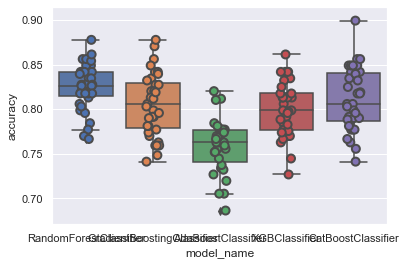

In [92]:
models = [
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(learning_rate=0.5, n_estimators=800),
    AdaBoostClassifier(n_estimators=120, learning_rate=0.7),
    XGBClassifier(n_estimators=1200, learning_rate=0.8),
    CatBoostClassifier(n_estimators=300, learning_rate=0.7)
]
CV = 35
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy',  cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [93]:
cv_df.groupby('model_name').accuracy.mean()

model_name
AdaBoostClassifier            0.758774
CatBoostClassifier            0.810181
GradientBoostingClassifier    0.805383
RandomForestClassifier        0.823813
XGBClassifier                 0.799465
Name: accuracy, dtype: float64

In [94]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##### Avaliação do modelo

Nesta etapa, após o treinamento dos modelos faremos a avaliação do mesmo, observando métricas como Score, Recall, Precision, F1-Score e Kappa. 

Observaremos todas essas métricas uma vez que podemos ter um modelo com um bías e se levarmos somente uma métrica como medida de avaliação do modelo, podemos nos equivocar na sua real precisão.

Todos as métricas vão de 0 a 1, lembrando que quanto mais próximo de 1 melhor.

In [95]:
def metrics(X_test, y_test, metric_type):
    test_preds = model.predict(X_test)

    test_score = round(model.score(X_test, y_test),2)
    test_rec_s = round(recall_score(y_test, test_preds), 2)
    test_prec_s = round(precision_score(y_test, test_preds, 2))
    test_f1 = round(f1_score(y_test, test_preds), 2)
    test_kappa = round(cohen_kappa_score(y_test, test_preds), 2)

    print("Métricas do modelo Gradient Boosting no dataset de", metric_type)
    print('\n')
    print('score: ', test_score)
    print('recall: ', test_rec_s)
    print('prec: ', test_prec_s)
    print('f1: ', test_f1)
    print('kappa: ', test_kappa)
    print('')

Entendimento sobre algumas métricas aqui apresentadas.

Accuracy - True positive / total rows

f1 Score - Média harmônica entre precision e recall. Boa para classes desproporcionais.

Precision - Número de registros classificados como sendo de uma classe e que realmente são daquela classe, divido pela soma entre este número e a soma dos que foram classificados nesta classe mas pertencem a outra. True positive/true positive+false positive.

Recall - Número de registros classificados e que realmente pertencem a esta classe, dividido pela quantidade de registros que temos nesta classe. True positive / positive.

Kappa Statistics - Métrica que avalia o nível de concordância de uma classificação, concordância total teriamos um valor igual a 1, bem como podemose ter baixa ou concordância negativa.


In [96]:
metrics(X_test, y_test, "Teste"), metrics(X_valid, y_valid, "Validação")

Métricas do modelo Gradient Boosting no dataset de Teste


score:  0.85
recall:  0.87
prec:  1.0
f1:  0.88
kappa:  0.68

Métricas do modelo Gradient Boosting no dataset de Validação


score:  0.83
recall:  0.89
prec:  1.0
f1:  0.87
kappa:  0.63



(None, None)

##### Matriz de confusão

A matriz de confusão nos fornece a visão de quanto o modelo errou e acertou.

Podemos notar que a maior parte dos erros esta relacionado a classe 1, pois temos uma quantidade menor de dados nesta classe, 1267 contra 5190 na classe 0, observando precision, recall e f1-score de cada classe podemos comprovar o comportamento de que o modelo aprendeu mais a classe com mais observações.

In [97]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[122  29]
 [ 32 221]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.88      0.87      0.88       253

    accuracy                           0.85       404
   macro avg       0.84      0.84      0.84       404
weighted avg       0.85      0.85      0.85       404



##### Curva ROC dataset de teste

A curva roc (receiver operating characteristic) nos ajuda a visualizar o quão bom pode ser um modelo de classificação binária. Temos duas métricas para analisar, a taxa de Falso positivo e taxa de verdadeiro positivo.

A idéia é ter um auc cobrindo a maior parte possível do gráfico, e ter um valor mais próximo de 1, no nosso caso temos um auc de 0.82, o que nos mostra que nosso modelo não é excelente.

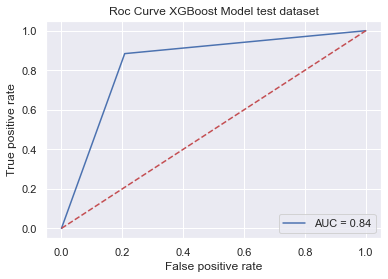

In [98]:
false_positive_rate, true_positive_rate,thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate,true_positive_rate)

plt.title('Roc Curve XGBoost Model test dataset')
plt.plot(false_positive_rate,true_positive_rate,'b', label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

##### Features mais importantes

Aqui temos as features elencadas como mais importantes pelo nosso modelo, podemos ver que a mais importante delas é o teor alcólico, seguido pelas demais variáveis que tem importância muito próxima.

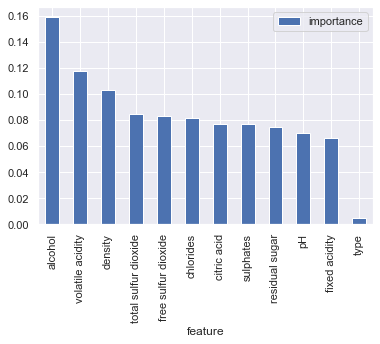

In [99]:
importances = pd.DataFrame({'feature':X_test.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

Nosso dataset apesar de ter sido modificado sua variável target para binária, sofreu poucas alterações nas demais features, não havia muito espaço para criação de novas features, talvez em um próximo passo podemos desenvolver um modelo mais robusto talvez pensar em usar técnicas de undersampling ou oversampling para suprir o desbalanceamento das classes preditoras, bem como modelos com suporte a classes desbalanceadas. 